In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset("titanic")

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot: >

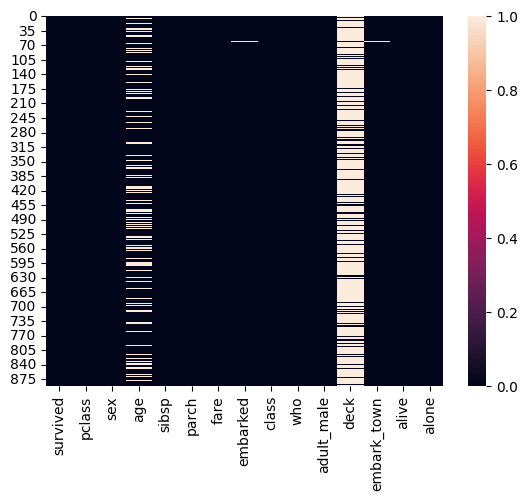

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


## hendaling missing data 

In [7]:
## hendaling missing data 
df[["age"]].isnull().sum()

age    177
dtype: int64

### using mean

In [8]:
## we can handle the missing data by mean, median, mode


In [9]:
## if we have normaly distributed data then we can handled missing data by using mean 


In [10]:
df[["filled_mean_age"]] = df[["age"]].fillna(df["age"].mean())

In [11]:
df[["filled_mean_age" , "age"]]

,filled_mean_age,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


C:\Users\dhruv\AppData\Local\Temp\ipykernel_23104\3036827104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[["age"]])


<AxesSubplot: ylabel='Density'>

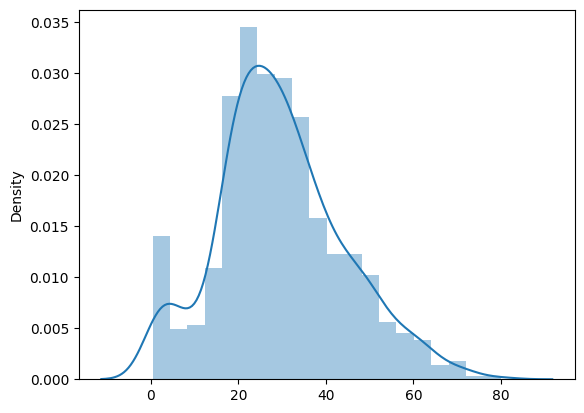

In [12]:
sns.distplot(df[["age"]])

## if we have normal distribution then only we can fill the data by using mean 

### median

In [13]:
## when our data set have outliers we can fill the nan value by using median 
## at this time we can not use mean because mean is sensitive to the outliers. 

In [14]:
df[["median_age"]] = df[["age"]].fillna(df["age"].median())

In [15]:
df[["median_age","filled_mean_age","age"]]

,median_age,filled_mean_age,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


### mode

In [16]:
## if suppose we have catogorical attribute then we can use mode to fill na 


In [17]:
df["embarked"].isnull().sum()

2

In [18]:
df[df["embarked"].notnull()]["embarked"].mode()[0]

'S'

In [30]:
df[df["embarked"].notnull()]["embarked"].mode()[0]

'S'

In [31]:
df[["mode_embarked"]]= df[["embarked"]].fillna(df[df["embarked"].notnull()]["embarked"].mode()[0])

In [32]:
df[["mode_embarked", "embarked"]]

,mode_embarked,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [33]:
df["mode_embarked"].isnull().sum()

0

In [34]:
df["embarked"].isnull().sum()

2

## handle unbelanced data

In [1]:
import pandas as pd
import numpy as np

In [2]:
n_sample = 1000

ratio = 0.9
class_0_n = int(n_sample*ratio)
class_1_n = n_sample - class_0_n

In [3]:
class_0_n,class_1_n

(900, 100)

In [5]:
class_0 = pd.DataFrame({
    "feature1": np.random.normal(loc=0,scale=1,size=class_0_n),
    "feature2": np.random.normal(loc=0,scale=1,size=class_0_n),
    "target": [0]*class_0_n}
)
    
class_1 =pd.DataFrame({
    "feature1": np.random.normal(loc=2,scale=2,size=class_1_n),
    "feature2": np.random.normal(loc=2,scale=2,size=class_1_n),
    "target": [1]*class_1_n}
)

In [6]:
class_0

,feature1,feature2,target
0,0.135808,-0.224820,0
1,0.793120,-1.119217,0
2,-1.519507,-0.337647,0
3,-0.042095,-0.820981,0
4,0.263171,-0.008760,0
...,...,...,...
895,0.410062,-0.230658,0
896,-0.723074,0.557893,0
897,-0.792527,0.737878,0
898,0.211720,-0.327435,0


In [7]:
class_1

,feature1,feature2,target
0,2.435902,1.863742,1
1,2.680322,3.015175,1
2,2.576181,-0.016341,1
3,0.050760,2.079558,1
4,5.088689,-0.164566,1
...,...,...,...
95,5.204318,0.333360,1
96,6.656270,1.301155,1
97,0.290501,-2.196439,1
98,3.290269,2.161959,1


In [8]:
df = pd.concat([class_0,class_1],axis=0).reset_index(drop=True)

In [9]:
majority = df[df["target"]==0]

In [10]:
minority = df[df["target"]==1]

In [11]:
majority

,feature1,feature2,target
0,0.135808,-0.224820,0
1,0.793120,-1.119217,0
2,-1.519507,-0.337647,0
3,-0.042095,-0.820981,0
4,0.263171,-0.008760,0
...,...,...,...
895,0.410062,-0.230658,0
896,-0.723074,0.557893,0
897,-0.792527,0.737878,0
898,0.211720,-0.327435,0


In [12]:
majority.shape

(900, 3)

In [13]:
minority

,feature1,feature2,target
900,2.435902,1.863742,1
901,2.680322,3.015175,1
902,2.576181,-0.016341,1
903,0.050760,2.079558,1
904,5.088689,-0.164566,1
...,...,...,...
995,5.204318,0.333360,1
996,6.656270,1.301155,1
997,0.290501,-2.196439,1
998,3.290269,2.161959,1


In [14]:
minority.shape

(100, 3)

In [ ]:
# we can clearly see that our data in un balanced

# 1. upsampling

In [15]:
from sklearn.utils import resample

In [16]:
minority_upsampling = resample(minority,
                               replace=True,  # it is sampling with replace ment 
                               n_samples=len(majority),  # to match majority
                               random_state=42
)

In [17]:
minority

,feature1,feature2,target
900,2.435902,1.863742,1
901,2.680322,3.015175,1
902,2.576181,-0.016341,1
903,0.050760,2.079558,1
904,5.088689,-0.164566,1
...,...,...,...
995,5.204318,0.333360,1
996,6.656270,1.301155,1
997,0.290501,-2.196439,1
998,3.290269,2.161959,1


In [18]:
minority_upsampling

,feature1,feature2,target
951,1.298824,3.219218,1
992,2.933432,0.716689,1
914,5.370879,2.828821,1
971,4.253313,2.079346,1
960,5.282499,-0.138743,1
...,...,...,...
952,3.434746,0.346250,1
965,3.760483,0.021263,1
976,-1.314809,1.836301,1
942,1.649076,0.118452,1


In [19]:
df_upsampling = pd.concat([majority,minority_upsampling],axis=0).reset_index(drop=True)

In [20]:
df_upsampling

,feature1,feature2,target
0,0.135808,-0.224820,0
1,0.793120,-1.119217,0
2,-1.519507,-0.337647,0
3,-0.042095,-0.820981,0
4,0.263171,-0.008760,0
...,...,...,...
1795,3.434746,0.346250,1
1796,3.760483,0.021263,1
1797,-1.314809,1.836301,1
1798,1.649076,0.118452,1


## 2.dwon sampling

In [22]:
majority

,feature1,feature2,target
0,0.135808,-0.224820,0
1,0.793120,-1.119217,0
2,-1.519507,-0.337647,0
3,-0.042095,-0.820981,0
4,0.263171,-0.008760,0
...,...,...,...
895,0.410062,-0.230658,0
896,-0.723074,0.557893,0
897,-0.792527,0.737878,0
898,0.211720,-0.327435,0


In [21]:
minority

,feature1,feature2,target
900,2.435902,1.863742,1
901,2.680322,3.015175,1
902,2.576181,-0.016341,1
903,0.050760,2.079558,1
904,5.088689,-0.164566,1
...,...,...,...
995,5.204318,0.333360,1
996,6.656270,1.301155,1
997,0.290501,-2.196439,1
998,3.290269,2.161959,1


In [23]:
majority_dwonsampling = resample(majority,
                                replace=False, # sampaling without replacement
                                n_samples=len(minority), ## to matchn minority
                                random_state=42
                                )

In [24]:
majority_dwonsampling

,feature1,feature2,target
70,2.215097,-0.394749,0
827,-0.840027,2.413975,0
231,-0.433571,-0.070111,0
588,-0.035590,-1.807591,0
39,1.038683,2.963611,0
...,...,...,...
398,0.536802,0.426939,0
76,2.093044,-0.650286,0
196,0.042580,-0.053257,0
631,1.250342,2.003430,0


In [25]:
df_dwonsampling = pd.concat([majority_dwonsampling,minority]).reset_index(drop=True)

In [26]:
df_dwonsampling

,feature1,feature2,target
0,2.215097,-0.394749,0
1,-0.840027,2.413975,0
2,-0.433571,-0.070111,0
3,-0.035590,-1.807591,0
4,1.038683,2.963611,0
...,...,...,...
195,5.204318,0.333360,1
196,6.656270,1.301155,1
197,0.290501,-2.196439,1
198,3.290269,2.161959,1


In [27]:
df_dwonsampling.shape

(200, 3)

In [28]:
df_upsampling.shape

(1800, 3)

In [29]:
df.shape

(1000, 3)

In [30]:
df["target"].value_counts()

0    900
1    100
Name: target, dtype: int64

In [31]:
df_dwonsampling["target"].value_counts()

0    100
1    100
Name: target, dtype: int64

In [32]:
df_upsampling["target"].value_counts()

0    900
1    900
Name: target, dtype: int64

# SMOTE

In [33]:
import numpy as np
import pandas as pd

#### create data set

In [34]:
from sklearn.datasets import make_classification

In [36]:
x,y=make_classification(n_samples=1000,n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.90],random_state=42)

In [37]:
len(y[y==0])

896

In [38]:
x

array([[ 1.0735459 , -1.10133925],
       [ 0.75594526, -1.1723519 ],
       [ 1.35447877, -0.94852841],
       ...,
       [-2.15090138, -2.98937226],
       [ 2.45164689, -0.1566294 ],
       [ 3.64147835,  0.75692519]])

In [39]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [40]:
df1 = pd.DataFrame(x,columns=["f1","f2"])

In [41]:
df2 = pd.DataFrame(y,columns=["target"])

In [42]:
df1

,f1,f2
0,1.073546,-1.101339
1,0.755945,-1.172352
2,1.354479,-0.948528
3,3.103090,0.233485
4,1.951888,-0.270157
...,...,...
995,1.713939,0.451639
996,1.509473,-0.794996
997,-2.150901,-2.989372
998,2.451647,-0.156629


In [43]:
df2

,target
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,0
997,0
998,0


In [44]:
df = pd.concat([df1,df2],axis=1)

In [45]:
df[df["target"]==0]

,f1,f2,target
0,1.073546,-1.101339,0
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,1.951888,-0.270157,0
...,...,...,...
992,1.004611,-0.990219,0
996,1.509473,-0.794996,0
997,-2.150901,-2.989372,0
998,2.451647,-0.156629,0


In [46]:
df

,f1,f2,target
0,1.073546,-1.101339,0
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,1.951888,-0.270157,0
...,...,...,...
995,1.713939,0.451639,1
996,1.509473,-0.794996,0
997,-2.150901,-2.989372,0
998,2.451647,-0.156629,0


In [47]:
import matplotlib.pyplot as plt

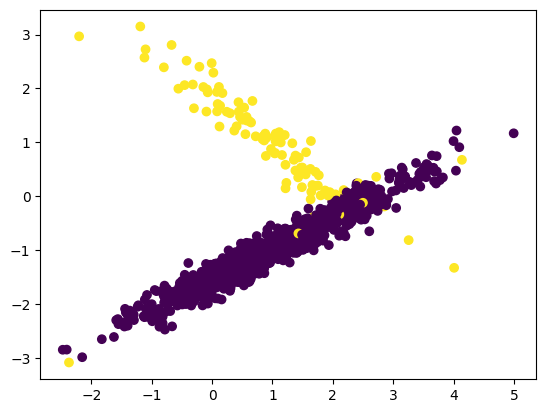

In [48]:
plt.scatter(df["f1"],df["f2"],c=df["target"])

In [ ]:
## now for unbalanced data we use one more technique called smote

### smote

In [ ]:
!pip install imblearn

In [49]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

#  smote is used for over sampling

In [50]:
x1,y1 = oversample.fit_resample(df[["f1","f2"]] , df[["target"]])

In [51]:
x1

,f1,f2
0,1.073546,-1.101339
1,0.755945,-1.172352
2,1.354479,-0.948528
3,3.103090,0.233485
4,1.951888,-0.270157
...,...,...
1787,1.524498,0.521266
1788,-0.073181,1.929542
1789,-0.507979,2.617294
1790,2.168134,0.107070


In [52]:
y1

,target
0,0
1,0
2,0
3,0
4,0
...,...
1787,1
1788,1
1789,1
1790,1


In [53]:
smote_data = pd.concat([x1,y1],axis=1).reset_index(drop=True)

In [54]:
len(smote_data[smote_data["target"] == 0])

896

In [55]:
len(smote_data[smote_data["target"] == 1])

896

In [56]:
len(df[df["target"]==0])

896

In [57]:
len(df[df["target"]==1])

104

In [59]:
smote_data

,f1,f2,target
0,1.073546,-1.101339,0
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,1.951888,-0.270157,0
...,...,...,...
1787,1.524498,0.521266,1
1788,-0.073181,1.929542,1
1789,-0.507979,2.617294,1
1790,2.168134,0.107070,1


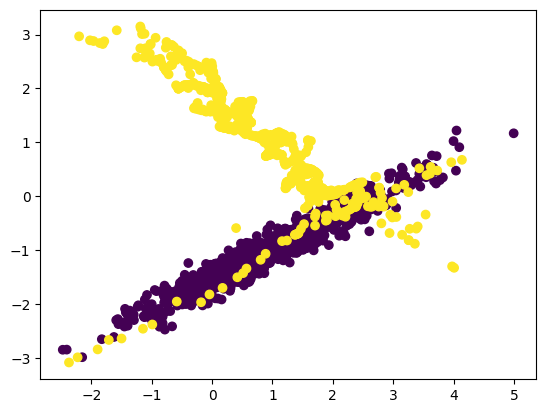

In [60]:
plt.scatter(smote_data["f1"],smote_data["f2"],c=smote_data["target"])

# Data interpolation 

## linear interpolation

In [61]:
import numpy as np

x = np.array([1,2,3,4,5])
y = np.array([2,3,4,5,6])

In [62]:
x,y

(array([1, 2, 3, 4, 5]), array([2, 3, 4, 5, 6]))

In [63]:
import matplotlib.pyplot as plt

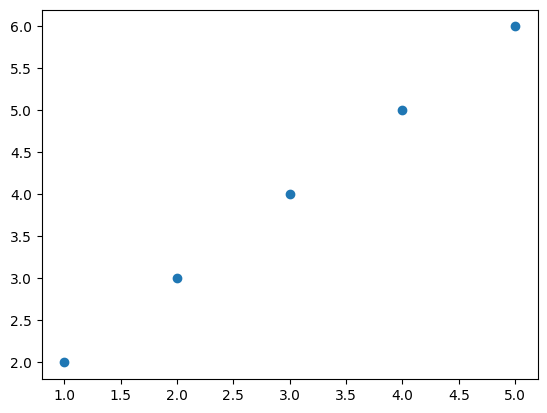

In [64]:
plt.scatter(x,y)

In [65]:
x_new = np.linspace(1,5,15)
y_inter = np.interp(x_new ,x ,y)

In [66]:
x_new,y_inter

(array([1.        , 1.28571429, 1.57142857, 1.85714286, 2.14285714,
        2.42857143, 2.71428571, 3.        , 3.28571429, 3.57142857,
        3.85714286, 4.14285714, 4.42857143, 4.71428571, 5.        ]),
 array([2.        , 2.28571429, 2.57142857, 2.85714286, 3.14285714,
        3.42857143, 3.71428571, 4.        , 4.28571429, 4.57142857,
        4.85714286, 5.14285714, 5.42857143, 5.71428571, 6.        ]))

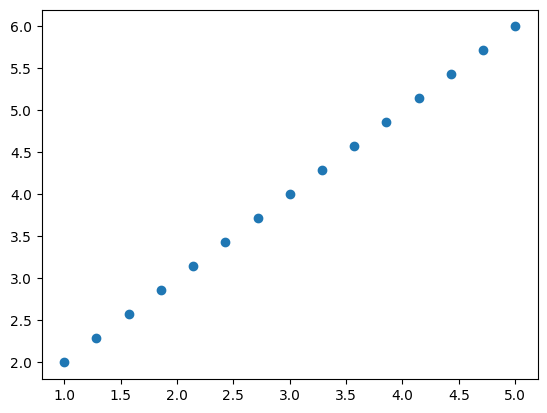

In [67]:
plt.scatter(x_new,y_inter)

## cubic interpolation

In [68]:
x = np.array([1,2,3,4,5])
y = np.array([1,8,27,64,125])
x,y

(array([1, 2, 3, 4, 5]), array([  1,   8,  27,  64, 125]))

In [69]:
from scipy.interpolate import interp1d

In [70]:
f = interp1d(x,y,kind="cubic")

In [71]:
x_new = np.linspace(1,5,10)
y_int = f(x_new)
x_new , y_int

(array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
        3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ]),
 array([  1.        ,   3.01371742,   6.739369  ,  12.7037037 ,
         21.43347051,  33.45541838,  49.2962963 ,  69.48285322,
         94.54183813, 125.        ]))

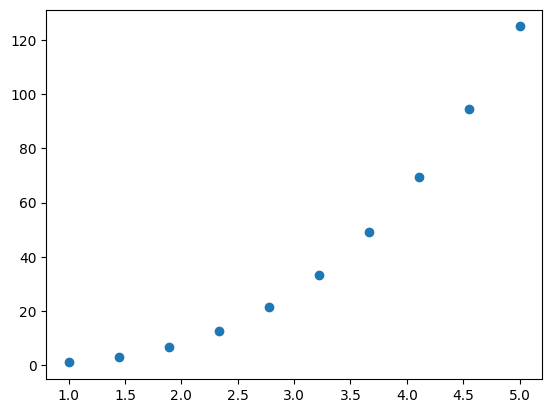

In [72]:
plt.scatter(x_new,y_int)

## poly interpolation

In [73]:
x = np.array([1,2,3,4,5])
y = np.array([1,4,9,25,40])


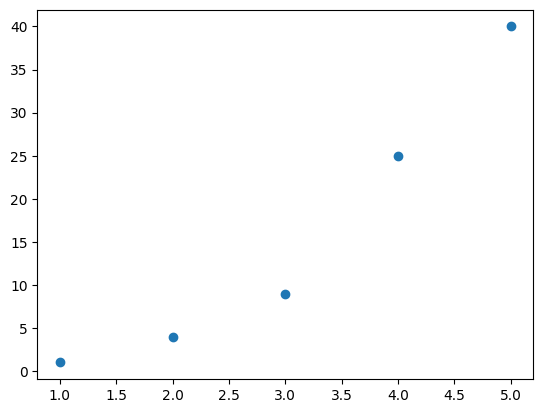

In [74]:
plt.scatter(x,y)

In [75]:
npp = np.polyfit(x,y,8)

C:\Users\dhruv\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [76]:
x_ne = np.linspace(1,5,10)
y_i = np.polyval(npp,x_ne)

In [77]:
x_ne,y_i

(array([1.        , 1.44444444, 1.88888889, 2.33333333, 2.77777778,
        3.22222222, 3.66666667, 4.11111111, 4.55555556, 5.        ]),
 array([ 1.        ,  2.61608544,  3.73233449,  4.97054275,  7.20388683,
        11.3972496 , 18.23558502, 27.44623764, 36.70504883, 40.        ]))

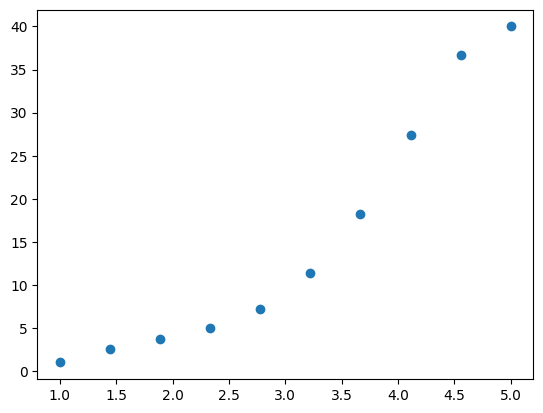

In [78]:
plt.scatter(x_ne , y_i)

## handling outliers

### we can handle outliers using 5 number summery

1. minimum
2. Q1
3. Q2 median
4. Q3
5. maximum

In [1]:
import numpy as np

l_marks = [38,40,50,54,58,60,65,66,70,80,95,90,99,1000,1100]

In [2]:
# now 
q1 = np.percentile(l_marks,25)

In [3]:
q1

56.0

In [5]:
maximum = np.percentile(l_marks,100)
maximum

1100.0

In [82]:
#  another method

minimum,q1,q2,q3,maximum = np.quantile(l_marks,[0,0.25,0.50,0.75,1])

In [83]:
minimum,q1,q2,q3,maximum

(38.0, 56.0, 66.0, 92.5, 1100.0)

In [84]:
# now calculate iqr

iqr = q3-q1

In [85]:
lower_fence = q1 - 1.5*(iqr)
higher_fence = q3 + 1.5*(iqr)

In [86]:
lower_fence,higher_fence

(1.25, 147.25)

In [87]:
# now try to capture outliers 

outliers = []

for i in l_marks:
    if ((i<=lower_fence)|(i>=higher_fence)):
        outliers.append(i)

In [88]:
outliers

[1000, 1100]

In [89]:
l_marks

[38, 40, 50, 54, 58, 60, 65, 66, 70, 80, 95, 90, 99, 1000, 1100]

In [90]:
import seaborn as sns 

<AxesSubplot: >

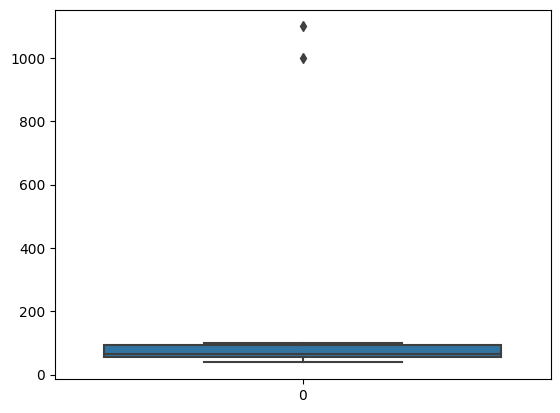

In [91]:
sns.boxplot(l_marks)

In [92]:
l_marks

[38, 40, 50, 54, 58, 60, 65, 66, 70, 80, 95, 90, 99, 1000, 1100]

In [93]:
outliers

[1000, 1100]

In [94]:
l_marks_without_out = [i for i in l_marks if i not in outliers]

In [95]:
l_marks_without_out

[38, 40, 50, 54, 58, 60, 65, 66, 70, 80, 95, 90, 99]

<AxesSubplot: >

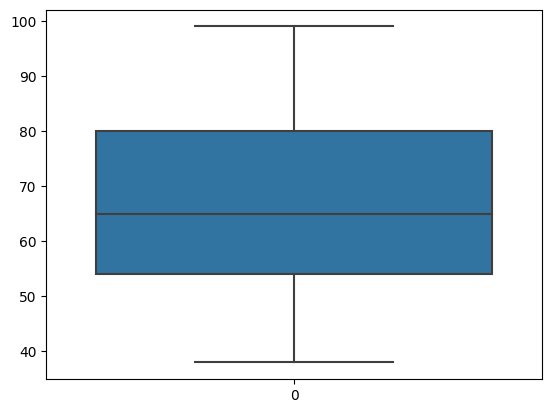

In [96]:
sns.boxplot(l_marks_without_out)

## Feature Scalling 

### Standaradization

In [97]:
import seaborn as sns 

In [98]:
tip = sns.load_dataset("tips")

In [99]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [100]:
total = list(tip["total_bill"])

In [101]:
import numpy as np

In [102]:
mean = np.mean(total)
std = np.std(total)

In [103]:
normalaized = []
for i in total :
    z_score  = (i-mean)/std
    normalaized.append(z_score)

In [104]:
normalaized

[-0.3147113050904943,
 -1.0632353132988692,
 0.13777989987156145,
 0.43831510316725475,
 0.540744704290506,
 0.6195367051545455,
 -1.2399545152367863,
 0.7985071071171495,
 -0.5342033074974614,
 -0.5634689078183903,
 -1.0711145133852733,
 1.7417599174609364,
 -0.49143050702841123,
 -0.15262490331304146,
 -0.557840907756673,
 0.2019391005751361,
 -1.0643609133112126,
 -0.3935033059545337,
 -0.31696250511518104,
 0.09725829942719795,
 -0.2100305039425557,
 0.05673669898283484,
 -0.45203450659639155,
 2.2100095225958003,
 0.003833498402694168,
 -0.2224121040783337,
 -0.7221785095588127,
 -0.7987193103981653,
 0.21544630072325727,
 -0.015301701807144186,
 -1.1521577142739994,
 -0.16162970341178864,
 -0.5319521074727743,
 0.10176069947657193,
 -0.22578890411536368,
 0.4810879036363046,
 -0.3912521059298469,
 -0.32146490516455467,
 -0.12335930299211233,
 1.2926455125359115,
 -0.4216433062631192,
 -0.2618081045103532,
 -0.6580193088552376,
 -1.137524914113535,
 1.1947183114620337,
 -0.1683833

<AxesSubplot: ylabel='Count'>

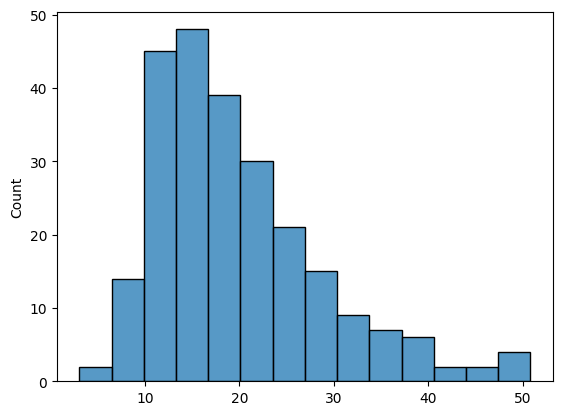

In [105]:
sns.histplot(total)

<AxesSubplot: ylabel='Count'>

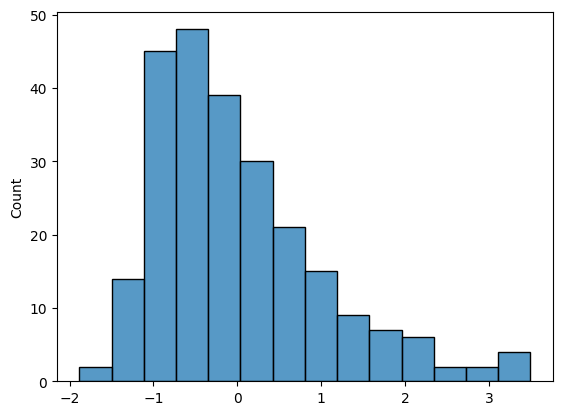

In [106]:
sns.histplot(normalaized)

## using library

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
scaler = StandardScaler()

In [109]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [110]:
scaler.fit(tip[["total_bill" , "tip"]])

# fit do :
#         Compute the mean and std to be used for later scaling.

#  it compute the mean and std for total_bill,tip 

StandardScaler()

In [111]:
scaler.transform(tip[["total_bill","tip"]])

array([[-3.14711305e-01, -1.43994695e+00],
       [-1.06323531e+00, -9.69205340e-01],
       [ 1.37779900e-01,  3.63355539e-01],
       [ 4.38315103e-01,  2.25754144e-01],
       [ 5.40744704e-01,  4.43019505e-01],
       [ 6.19536705e-01,  1.23965916e+00],
       [-1.23995452e+00, -7.22971264e-01],
       [ 7.98507107e-01,  8.81527488e-02],
       [-5.34203307e-01, -7.51939979e-01],
       [-5.63468908e-01,  1.67816714e-01],
       [-1.07111451e+00, -9.32994446e-01],
       [ 1.74175992e+00,  1.44968234e+00],
       [-4.91430507e-01, -1.03438495e+00],
       [-1.52624903e-01,  1.24660453e-03],
       [-5.57840908e-01,  1.57309619e-02],
       [ 2.01939101e-01,  6.67527044e-01],
       [-1.06436091e+00, -9.61963161e-01],
       [-3.93503306e-01,  5.15441291e-01],
       [-3.16962505e-01,  3.63355539e-01],
       [ 9.72582994e-02,  2.54722859e-01],
       [-2.10030504e-01,  7.83401903e-01],
       [ 5.67366990e-02, -1.79807863e-01],
       [-4.52034507e-01, -5.56401155e-01],
       [ 2.

In [112]:
import pandas as pd 

df = pd.DataFrame(scaler.transform(tip[["total_bill","tip"]]) , columns=["total__bill","tipsss"])

In [113]:
df

,total__bill,tipsss
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


## Normalaization

### min max normalaization

In [114]:
#  in ml we generaly use stadarderization
#  in dl we use normalization

In [115]:
import seaborn as sns

In [116]:
df = sns.load_dataset("taxis")

In [117]:
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [118]:
from sklearn.preprocessing import MinMaxScaler

In [119]:
min_max = MinMaxScaler()

In [120]:
min_max.fit(df[["distance","fare" ,"tip"]])

MinMaxScaler()

In [121]:
min_max.transform(df[["distance","fare" ,"tip"]])

array([[0.04359673, 0.04026846, 0.06475904],
       [0.02152589, 0.02684564, 0.        ],
       [0.0373297 , 0.04362416, 0.07108434],
       ...,
       [0.11280654, 0.10067114, 0.        ],
       [0.03051771, 0.03355705, 0.        ],
       [0.10490463, 0.09395973, 0.10120482]])

In [122]:
min_max.fit_transform(df[["distance","fare" ,"tip"]])

array([[0.04359673, 0.04026846, 0.06475904],
       [0.02152589, 0.02684564, 0.        ],
       [0.0373297 , 0.04362416, 0.07108434],
       ...,
       [0.11280654, 0.10067114, 0.        ],
       [0.03051771, 0.03355705, 0.        ],
       [0.10490463, 0.09395973, 0.10120482]])

In [123]:
min_max.transform([[2,3,4]])

C:\Users\dhruv\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.05449591, 0.01342282, 0.12048193]])

## unit vector

In [124]:
df = sns.load_dataset("iris")

In [125]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [126]:
from sklearn.preprocessing import normalize

In [127]:
df.iloc[:,[0,1,2,3]]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [128]:
normalize(df.iloc[:,[0,1]])

array([[0.82451335, 0.5658425 ],
       [0.8528513 , 0.52215386],
       [0.82659925, 0.56279098],
       [0.82926643, 0.55885346],
       [0.81153434, 0.58430473],
       [0.81067923, 0.58549055],
       [0.80417614, 0.59439106],
       [0.8269265 , 0.56231002],
       [0.8349582 , 0.55031336],
       [0.84507884, 0.53464171],
       [0.82493237, 0.56523144],
       [0.81602448, 0.57801734],
       [0.8479983 , 0.52999894],
       [0.82012695, 0.5721816 ],
       [0.82321279, 0.56773296],
       [0.79159032, 0.61105218],
       [0.81067923, 0.58549055],
       [0.82451335, 0.5658425 ],
       [0.83205029, 0.5547002 ],
       [0.80188283, 0.59748132],
       [0.84623284, 0.53281327],
       [0.80942185, 0.58722762],
       [0.787505  , 0.61630826],
       [0.83957016, 0.54325128],
       [0.81602448, 0.57801734],
       [0.85749293, 0.51449576],
       [0.8269265 , 0.56231002],
       [0.82958775, 0.55837637],
       [0.83696961, 0.54724936],
       [0.82659925, 0.56279098],
       [0.

In [129]:
df_norm = pd.DataFrame(normalize(df.iloc[:,[0,1,2,3]]),columns=["sepal_length","sepal_width","petal_length","petal_width"])

In [130]:
df_norm

,sepal_length,sepal_width,petal_length,petal_width
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281


# Encoding

## Nominal / One hot encoding(OHE)

In [131]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [132]:
df = pd.DataFrame({
    "color":["red","blue","green","red","blue","green","red","blue","green"]
})

In [133]:
df

,color
0,red
1,blue
2,green
3,red
4,blue
5,green
6,red
7,blue
8,green


In [134]:
encoder = OneHotEncoder()

In [135]:
df1 = encoder.fit_transform(df[["color"]])

In [136]:
df1

<9x3 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [137]:
# to get feature name 
#  it short the data first
encoder.get_feature_names_out()

array(['color_blue', 'color_green', 'color_red'], dtype=object)

In [138]:
df2 = pd.DataFrame(df1.toarray(),columns=encoder.get_feature_names_out())

In [139]:
df2

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,0.0,1.0,0.0
6,0.0,0.0,1.0
7,1.0,0.0,0.0
8,0.0,1.0,0.0


In [140]:
new_df = pd.concat([df,df2],axis=1)

In [141]:
import seaborn as sns 
tip = sns.load_dataset("tips")

In [142]:
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [143]:
from sklearn.preprocessing import OneHotEncoder

In [144]:
encoder = OneHotEncoder()

In [145]:
encoder.fit(tip[["sex","smoker"]])

OneHotEncoder()

In [150]:
encoder.transform(tip[["sex","smoker"]]).toarray()

array([[1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],


In [151]:
col = encoder.get_feature_names_out()

In [152]:
new_df = pd.DataFrame(encoder.transform(tip[["sex","smoker"]]).toarray(),columns=col)

In [153]:
new_df

,sex_Female,sex_Male,smoker_No,smoker_Yes
0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0
4,1.0,0.0,1.0,0.0
...,...,...,...,...
239,0.0,1.0,1.0,0.0
240,1.0,0.0,0.0,1.0
241,0.0,1.0,0.0,1.0
242,0.0,1.0,1.0,0.0


In [154]:
my_df = pd.concat([tip,new_df],axis=1)

In [155]:
my_df

,total_bill,tip,sex,smoker,day,time,size,sex_Female,sex_Male,smoker_No,smoker_Yes
0,16.99,1.01,Female,No,Sun,Dinner,2,1.0,0.0,1.0,0.0
1,10.34,1.66,Male,No,Sun,Dinner,3,0.0,1.0,1.0,0.0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.0,1.0,1.0,0.0
3,23.68,3.31,Male,No,Sun,Dinner,2,0.0,1.0,1.0,0.0
4,24.59,3.61,Female,No,Sun,Dinner,4,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.0,1.0,1.0,0.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1.0,0.0,0.0,1.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.0,1.0,0.0,1.0
242,17.82,1.75,Male,No,Sat,Dinner,2,0.0,1.0,1.0,0.0


In [156]:
en = OneHotEncoder()

In [160]:
f = en.fit_transform(tip[["time"]])

In [161]:
f.toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [162]:
en.get_feature_names_out()

array(['time_Dinner', 'time_Lunch'], dtype=object)

In [163]:
time = pd.DataFrame(f.toarray(),columns = en.get_feature_names_out())

In [164]:
time

,time_Dinner,time_Lunch
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
239,1.0,0.0
240,1.0,0.0
241,1.0,0.0
242,1.0,0.0


In [165]:
all_new = pd.concat([my_df,time] , axis =1)

In [166]:
all_new

,total_bill,tip,sex,smoker,day,time,size,sex_Female,sex_Male,smoker_No,smoker_Yes,time_Dinner,time_Lunch
0,16.99,1.01,Female,No,Sun,Dinner,2,1.0,0.0,1.0,0.0,1.0,0.0
1,10.34,1.66,Male,No,Sun,Dinner,3,0.0,1.0,1.0,0.0,1.0,0.0
2,21.01,3.50,Male,No,Sun,Dinner,3,0.0,1.0,1.0,0.0,1.0,0.0
3,23.68,3.31,Male,No,Sun,Dinner,2,0.0,1.0,1.0,0.0,1.0,0.0
4,24.59,3.61,Female,No,Sun,Dinner,4,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.0,1.0,1.0,0.0,1.0,0.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1.0,0.0,0.0,1.0,1.0,0.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.0,1.0,0.0,1.0,1.0,0.0
242,17.82,1.75,Male,No,Sat,Dinner,2,0.0,1.0,1.0,0.0,1.0,0.0


## 

## Label Encoding

In [167]:
from sklearn.preprocessing import LabelEncoder

In [168]:
import pandas as pd 

In [179]:
data = pd.DataFrame({
    "key" : ["red","blue","green","yellow"]
})

In [180]:
data

,key
0,red
1,blue
2,green
3,yellow


In [181]:
d = {
    "red":1,
    "blue":2,
    "green":3,
    "yellow":4
}

In [184]:
data["new_key"] = data["key"].map(d)

In [185]:
data

,key,new_key
0,red,1
1,blue,2
2,green,3
3,yellow,4


In [186]:
encoder = LabelEncoder()

In [187]:
n = encoder.fit_transform(data["key"])

In [188]:
list(n)

#  it sort the data and give index

[2, 0, 1, 3]

In [189]:
d = pd.concat([data,pd.DataFrame(n,columns=["numeric"])],axis=1)

In [190]:
d

,key,new_key,numeric
0,red,1,2
1,blue,2,0
2,green,3,1
3,yellow,4,3


In [191]:
data[["key"]] = pd.DataFrame(list(n))

In [192]:
data

,key,new_key
0,2,1
1,0,2
2,1,3
3,3,4


## ordinal Encoding

In [193]:
data = pd.DataFrame({
    "size" : ["large","small","medium","XL"]
})

In [194]:
data

,size
0,large
1,small
2,medium
3,XL


In [195]:
# if we want to pass order we have to use ordinal encoding

In [196]:
from sklearn.preprocessing import OrdinalEncoder
order = OrdinalEncoder(categories=[["small","medium","large","XL"]])

In [197]:
order

OrdinalEncoder(categories=[['small', 'medium', 'large', 'XL']])

In [198]:
arr = order.fit_transform(data[["size"]])

In [199]:
arr

array([[2.],
       [0.],
       [1.],
       [3.]])

In [200]:
data

,size
0,large
1,small
2,medium
3,XL


In [201]:
data2 = pd.concat([data,pd.DataFrame((list(arr.astype(int))),columns=["num"])],axis=1)

In [202]:
data2

,size,num
0,large,2
1,small,0
2,medium,1
3,XL,3


## 

## target guided ordinal encoding

##   

In [203]:
data = pd.DataFrame({
    "city":["new_york","landon","buston","berlin","landon","buston","berlin"],
    "total_price" : [200,210,230,250,240,210,280]
})

In [204]:
data

,city,total_price
0,new_york,200
1,landon,210
2,buston,230
3,berlin,250
4,landon,240
5,buston,210
6,berlin,280


In [ ]:
#  replace the city by target mean 

In [205]:
data.groupby("city")["total_price"].mean()

city
berlin      265.0
buston      220.0
landon      225.0
new_york    200.0
Name: total_price, dtype: float64

In [206]:
city_dict = data.groupby("city")["total_price"].mean().to_dict()

In [207]:
city_dict

{'berlin': 265.0, 'buston': 220.0, 'landon': 225.0, 'new_york': 200.0}

In [208]:
data

,city,total_price
0,new_york,200
1,landon,210
2,buston,230
3,berlin,250
4,landon,240
5,buston,210
6,berlin,280


In [209]:
data["city"] = data["city"].map(city_dict)

In [210]:
data

,city,total_price
0,200.0,200
1,225.0,210
2,220.0,230
3,265.0,250
4,225.0,240
5,220.0,210
6,265.0,280


In [211]:
import seaborn as sns 

In [212]:
tip = sns.load_dataset("tips")

In [213]:
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [214]:
tip.groupby("time")["total_bill"].mean()

time
Lunch     17.168676
Dinner    20.797159
Name: total_bill, dtype: float64

In [215]:
time_dict = tip.groupby("time")["total_bill"].mean().to_dict()

In [216]:
time_dict

{'Lunch': 17.168676470588235, 'Dinner': 20.79715909090909}

In [217]:
tip["time"] = tip['time'].map(time_dict)

In [218]:
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,20.797159,2
1,10.34,1.66,Male,No,Sun,20.797159,3
2,21.01,3.50,Male,No,Sun,20.797159,3
3,23.68,3.31,Male,No,Sun,20.797159,2
4,24.59,3.61,Female,No,Sun,20.797159,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,20.797159,3
240,27.18,2.00,Female,Yes,Sat,20.797159,2
241,22.67,2.00,Male,Yes,Sat,20.797159,2
242,17.82,1.75,Male,No,Sat,20.797159,2


In [220]:
 tip.groupby(by = ["sex"])["total_bill"].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

In [221]:
sec_cost =  tip.groupby(by = ["sex"])["total_bill"].mean().to_dict()

In [222]:
sec_cost

{'Male': 20.74407643312102, 'Female': 18.05689655172414}

In [223]:
tip["sex"] = tip["sex"].map(sec_cost)

In [224]:
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,18.056897,No,Sun,20.797159,2
1,10.34,1.66,20.744076,No,Sun,20.797159,3
2,21.01,3.50,20.744076,No,Sun,20.797159,3
3,23.68,3.31,20.744076,No,Sun,20.797159,2
4,24.59,3.61,18.056897,No,Sun,20.797159,4
...,...,...,...,...,...,...,...
239,29.03,5.92,20.744076,No,Sat,20.797159,3
240,27.18,2.00,18.056897,Yes,Sat,20.797159,2
241,22.67,2.00,20.744076,Yes,Sat,20.797159,2
242,17.82,1.75,20.744076,No,Sat,20.797159,2


##  covariance and correlation

##  

In [225]:
import seaborn as sns 

In [226]:
df = sns.load_dataset("healthexp")

In [227]:
df

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


In [228]:
import numpy as np

In [229]:
df.corr()
# default pearson

C:\Users\dhruv\AppData\Local\Temp\ipykernel_2440\3378432730.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Spending_USD,Life_Expectancy
Year,1.000000,0.826273,0.902175
Spending_USD,0.826273,1.000000,0.579430
Life_Expectancy,0.902175,0.579430,1.000000


In [230]:
df.cov()

C:\Users\dhruv\AppData\Local\Temp\ipykernel_2440\1545644723.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,Year,Spending_USD,Life_Expectancy
Year,201.098848,2.571883e+04,41.915454
Spending_USD,25718.827373,4.817761e+06,4166.800912
Life_Expectancy,41.915454,4.166801e+03,10.733902


In [231]:
df.corr(method="pearson")

C:\Users\dhruv\AppData\Local\Temp\ipykernel_2440\2677068142.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method="pearson")


,Year,Spending_USD,Life_Expectancy
Year,1.000000,0.826273,0.902175
Spending_USD,0.826273,1.000000,0.579430
Life_Expectancy,0.902175,0.579430,1.000000


In [232]:
df.corr(method="spearman")

# spearman

C:\Users\dhruv\AppData\Local\Temp\ipykernel_2440\3186076061.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method="spearman")


,Year,Spending_USD,Life_Expectancy
Year,1.000000,0.931598,0.896117
Spending_USD,0.931598,1.000000,0.747407
Life_Expectancy,0.896117,0.747407,1.000000


In [233]:
tip = sns.load_dataset("tips")

In [237]:
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [238]:
tip.cov()[["total_bill","tip","time"]]

C:\Users\dhruv\AppData\Local\Temp\ipykernel_2440\695555380.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tip.cov()[["total_bill","tip","time"]]


KeyError: "['time'] not in index"

In [240]:
tip.cov()

C:\Users\dhruv\AppData\Local\Temp\ipykernel_2440\190696415.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tip.cov()


,total_bill,tip,size
total_bill,79.252939,8.323502,5.065983
tip,8.323502,1.914455,0.643906
size,5.065983,0.643906,0.904591


In [239]:
tip.corr()[["total_bill","tip","size"]]

C:\Users\dhruv\AppData\Local\Temp\ipykernel_2440\2197430941.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tip.corr()[["total_bill","tip","size"]]


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


# Eda:
## Exploratory data analysis

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [245]:
df =  pd.read_csv(r"C:\Users\dhruv\Downloads\winequality-red.csv",sep=";")

In [246]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## summary of data set 

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Discriptive summary of dataset

In [262]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## missing value count

In [249]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## shape of dataset

In [250]:
df.shape

(1599, 12)

## columns 

In [251]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## output feature

In [252]:
df["quality"]

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

## unique()

In [253]:
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

## value of each 

In [254]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
#  conclusion

#  imbalanced data 

## Duplicate

In [255]:
df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [256]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


## remove duplicate recored

In [257]:
df.drop_duplicates(inplace=True)

In [258]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [259]:
df.shape

(1359, 12)

## correlation

In [260]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


## Ploting

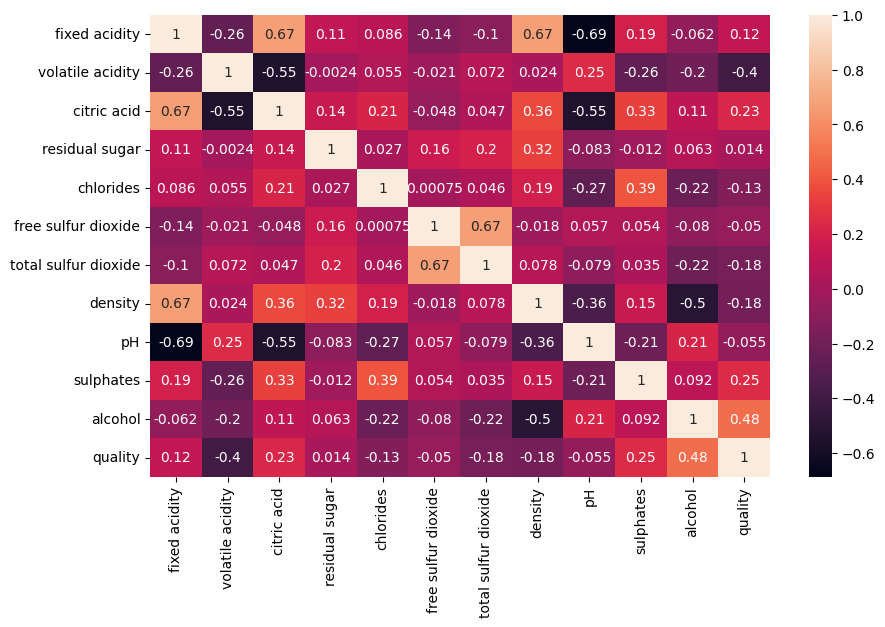

In [263]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

#  not use Figure 
#  use figure

In [264]:
df["quality"].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

<AxesSubplot: >

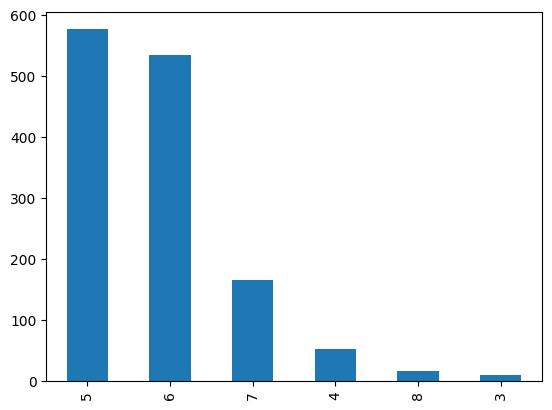

In [265]:
df["quality"].value_counts().plot(kind="bar")

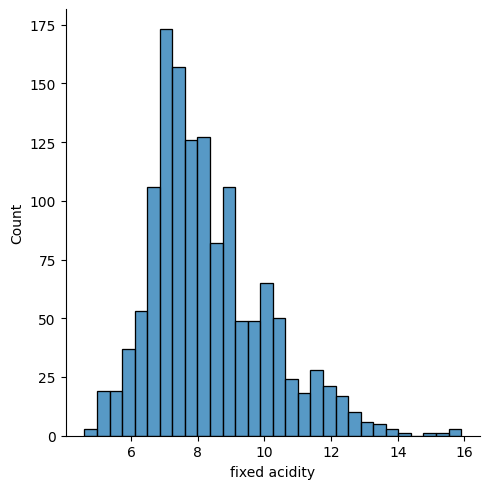

In [268]:
sns.displot(df["fixed acidity"])

C:\Users\dhruv\AppData\Local\Temp\ipykernel_2440\3886529257.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["fixed acidity"])


<AxesSubplot: xlabel='fixed acidity', ylabel='Density'>

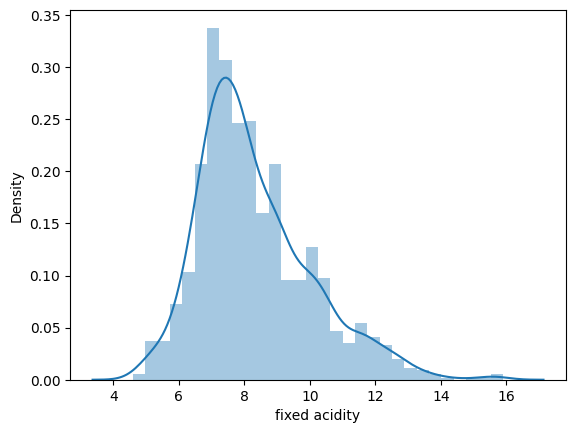

In [269]:
sns.distplot(df["fixed acidity"])

<AxesSubplot: xlabel='fixed acidity', ylabel='Count'>

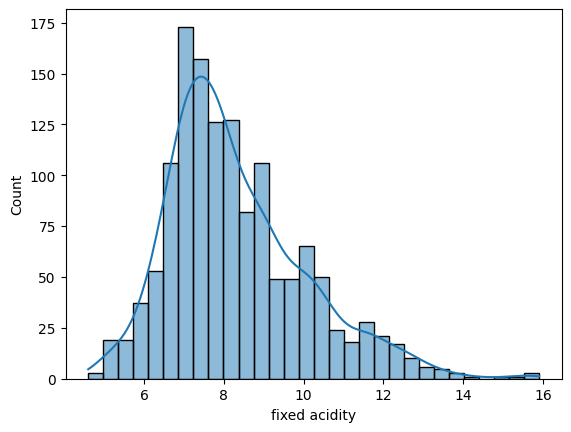

In [270]:
sns.histplot(df["fixed acidity"],kde=True)

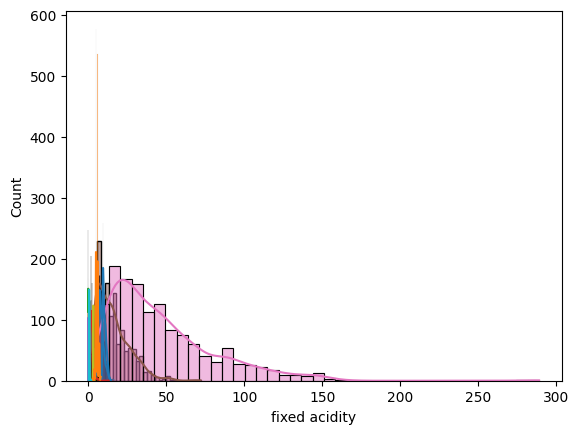

In [271]:
for i in df.columns:
    sns.histplot(df[i],kde=True)

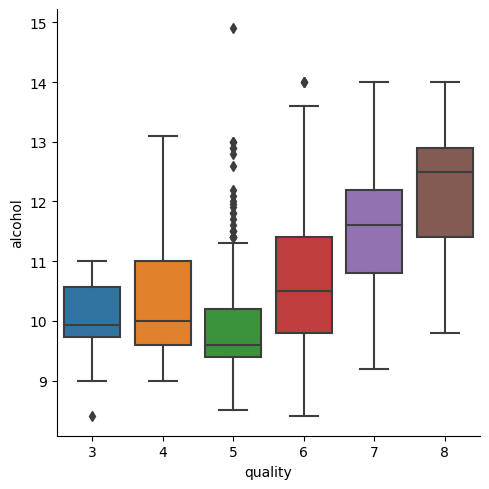

In [272]:
sns.catplot(data=df , x="quality",y="alcohol",kind="box")

<AxesSubplot: xlabel='alcohol', ylabel='pH'>

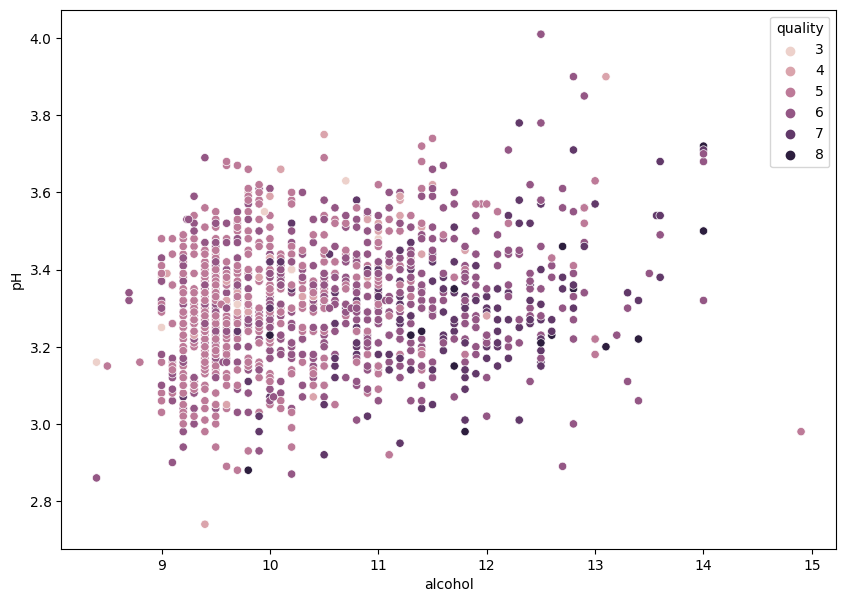

In [273]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df , x = "alcohol" , y = "pH" , hue="quality")

## student performance indecator

## EDA

In [274]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [275]:
df = pd.read_csv(r"C:\Users\dhruv\Downloads\exams.csv")

In [276]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [277]:
df.shape

(1000, 8)

In [278]:
df.size

8000

## alwas check :
   - Measing value 
   - Duplicate 
   - Check Data type 
   - Number of unique value in each columns 
   - Check statistics 
   - Check various categories present in difff categorical columns

In [279]:
#  missing value 

df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [280]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## insights Or Observation :
### there is no missing value

In [281]:
#  duplicate value
df.duplicated().sum()

0

## insights or observation:
### dataset contain zero duplicated value

In [282]:
## check for datatype 
## summary of data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [283]:
### unique 

df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     79
reading score                  71
writing score                  74
dtype: int64

In [286]:
# Check statistics
df.describe(include="object")

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,male,group C,some college,standard,none
freq,508,323,224,660,656


In [287]:
df.describe(include="all")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,male,group C,some college,standard,none,NaN,NaN,NaN
freq,508,323,224,660,656,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,67.810000,70.382000,69.140000
std,NaN,NaN,NaN,NaN,NaN,15.250196,14.107413,15.025917
min,NaN,NaN,NaN,NaN,NaN,15.000000,25.000000,15.000000
25%,NaN,NaN,NaN,NaN,NaN,58.000000,61.000000,59.000000
50%,NaN,NaN,NaN,NaN,NaN,68.000000,70.500000,70.000000
75%,NaN,NaN,NaN,NaN,NaN,79.250000,80.000000,80.000000


In [288]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


## observation or insights :
### we can observe that the mean score of all the subject are same
### some student score 100 in math , reading score , writing score
### minimun score in the subject are : 15,25,15


In [289]:
df["gender"].value_counts()

male      508
female    492
Name: gender, dtype: int64

In [290]:
df["race/ethnicity"].value_counts()

group C    323
group D    257
group B    198
group E    143
group A     79
Name: race/ethnicity, dtype: int64

In [291]:
df["parental level of education"].value_counts()

some college          224
high school           215
associate's degree    204
some high school      177
bachelor's degree     105
master's degree        75
Name: parental level of education, dtype: int64

In [293]:
df["lunch"].value_counts()

standard        660
free/reduced    340
Name: lunch, dtype: int64

In [294]:
## Explore data
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [295]:
df.tail(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62
999,male,group D,high school,standard,none,58,47,45


In [296]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [297]:
categorical_feature = [i for i in df.columns if df[i].dtype == "O"]
categorical_feature

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [298]:
categorical_feature = [i for i in df.columns if df[i].dtype == "object"]
categorical_feature

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [299]:
numerical_feature  = [i for i in df.columns if df[i].dtype != "O"]

In [300]:
df[categorical_feature]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group D,some college,standard,completed
1,male,group D,associate's degree,standard,none
2,female,group D,some college,free/reduced,none
3,male,group B,some college,free/reduced,none
4,female,group D,associate's degree,standard,none
...,...,...,...,...,...
995,male,group C,some college,standard,none
996,male,group C,some college,standard,none
997,female,group A,high school,standard,completed
998,male,group E,high school,standard,none


In [301]:
df[numerical_feature]

,math score,reading score,writing score
0,59,70,78
1,96,93,87
2,57,76,77
3,70,70,63
4,83,85,86
...,...,...,...
995,77,77,71
996,80,66,66
997,67,86,86
998,80,72,62


In [302]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [303]:
df["total_score"] = df["math score"] + df["reading score"] + df["writing score"]
df["avg"] = df["total_score"]/3
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg
0,female,group D,some college,standard,completed,59,70,78,207,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,276,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,210,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,203,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,254,84.666667


<AxesSubplot: xlabel='avg', ylabel='Count'>

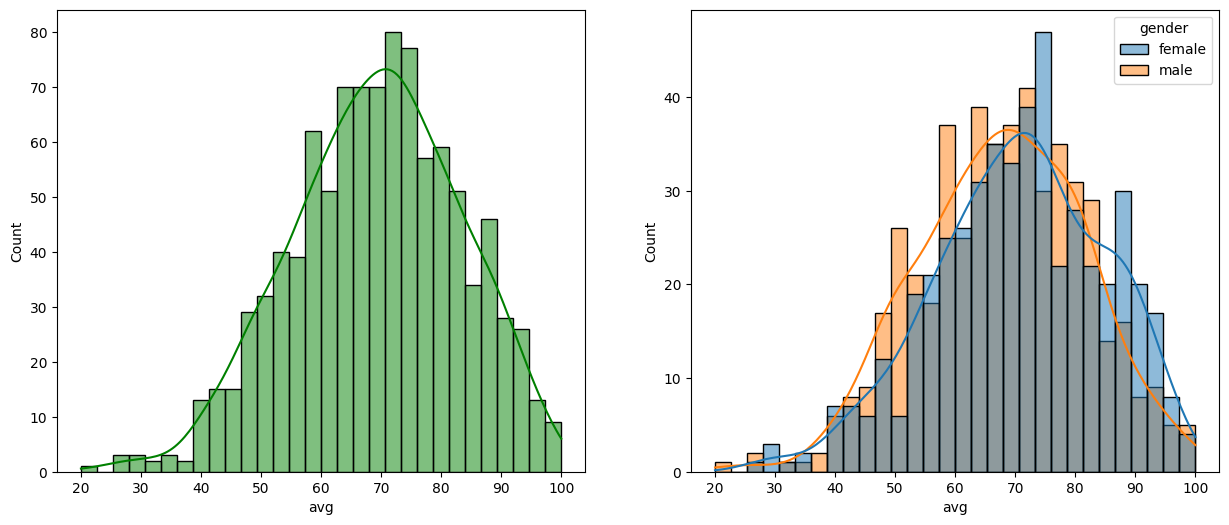

In [25]:
fig,ax = plt.subplots(1,2,figsize = (15,6))
plt.subplot(1,2,1)
sns.histplot(data=df,x="avg",bins=30,kde=True,color="g")
plt.subplot(1,2,2)
sns.histplot(data=df,x="avg",bins=30,kde=True,color="g",hue="gender")

## observation or insights
### female student are score more in the exam

<AxesSubplot: xlabel='avg', ylabel='Count'>

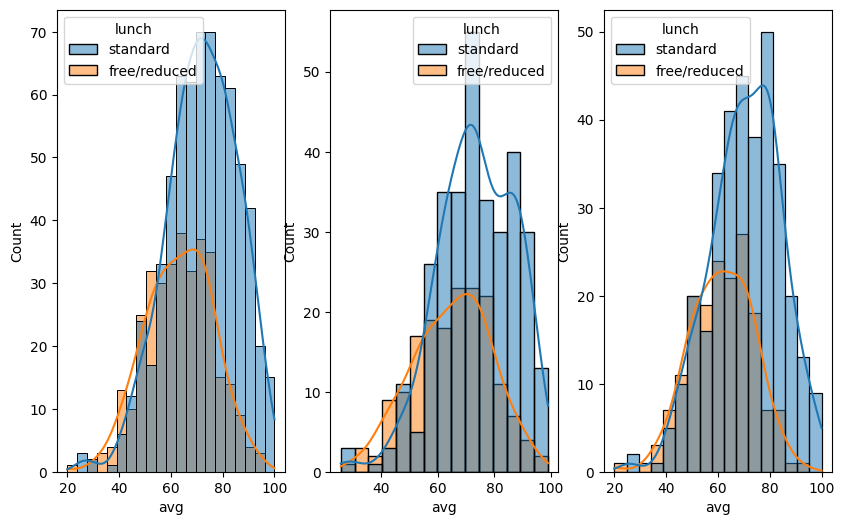

In [305]:
fig,ax = plt.subplots(1,3,figsize=(10,6))
plt.subplot(1,3,1)
sns.histplot(data=df,x="avg",kde=True,color="g",hue="lunch")
plt.subplot(1,3,2)
sns.histplot(data= df[df["gender"]=="female"], x="avg", kde=True, hue="lunch")
plt.subplot(1,3,3)
sns.histplot(data= df[df["gender"]=="male"], x="avg", kde=True, hue="lunch")

## observation or insights
### standard lunch help to perform well in exam
#### standard lunch help in exam whwther it is a male or female

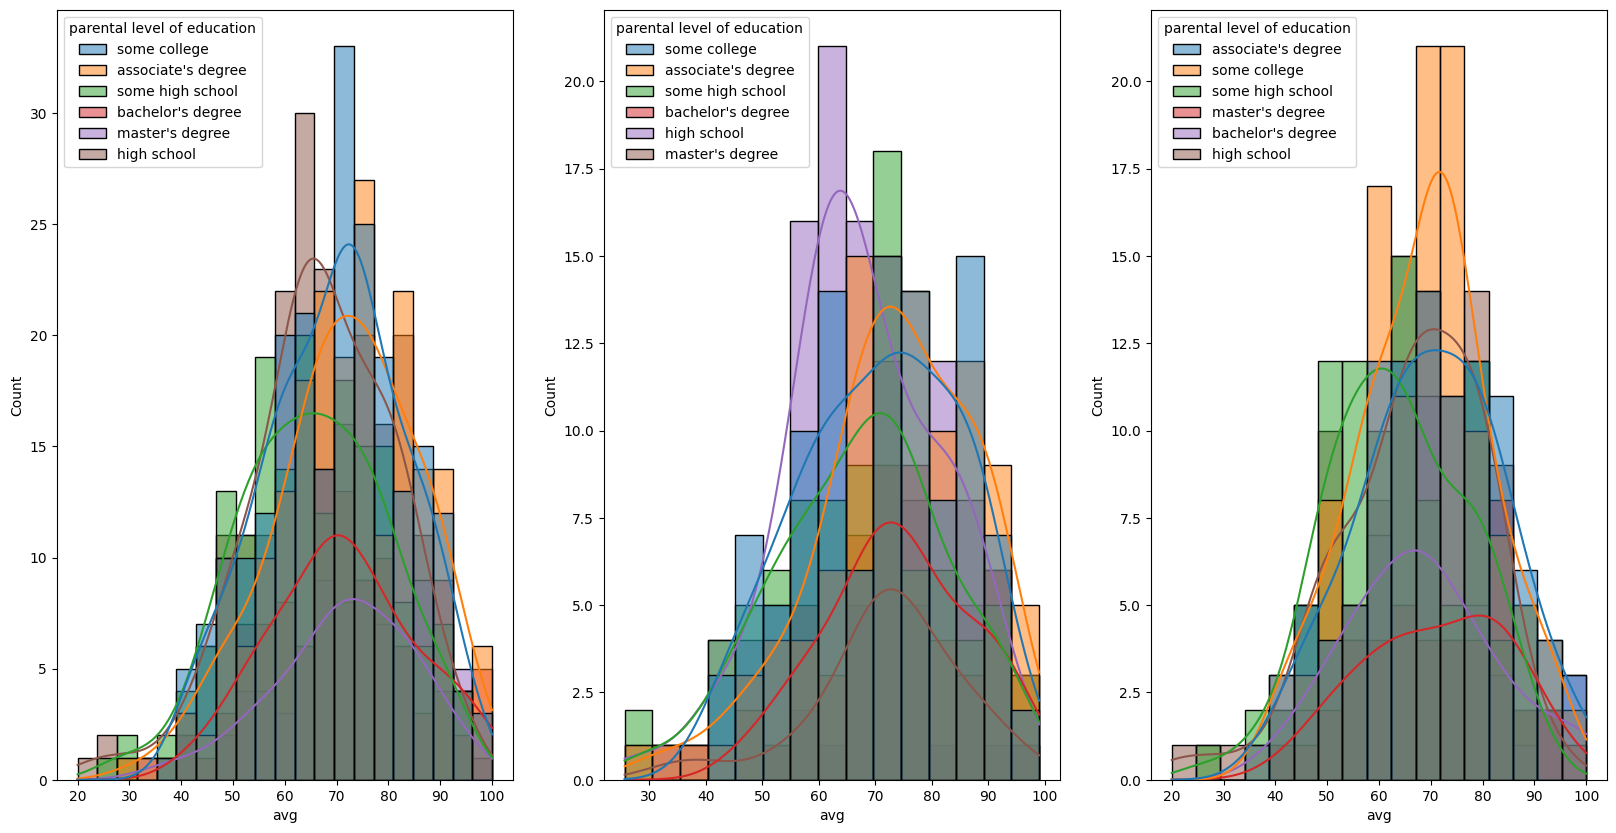

In [307]:
fig,ax = plt.subplots(1,3,figsize=(20,10))
plt.subplot(1,3,1)
sns.histplot(data=df,x="avg",kde=True,color="g",hue="parental level of education")
plt.subplot(1,3,2)
sns.histplot(data= df[df["gender"]=="female"], x="avg", kde=True, hue="parental level of education")
plt.subplot(1,3,3)
sns.histplot(data= df[df["gender"]=="male"], x="avg", kde=True, hue="parental level of education")
plt.show()

### observation :
#### in genral parent education does not effect student score in exam
#### 3rd plot show parents whose education of associates's master degree or bachelor degree their male child tend to perform well in exam
#### 2nd plot we can see there si no effect of parent education on there child

<AxesSubplot: xlabel='avg', ylabel='Count'>

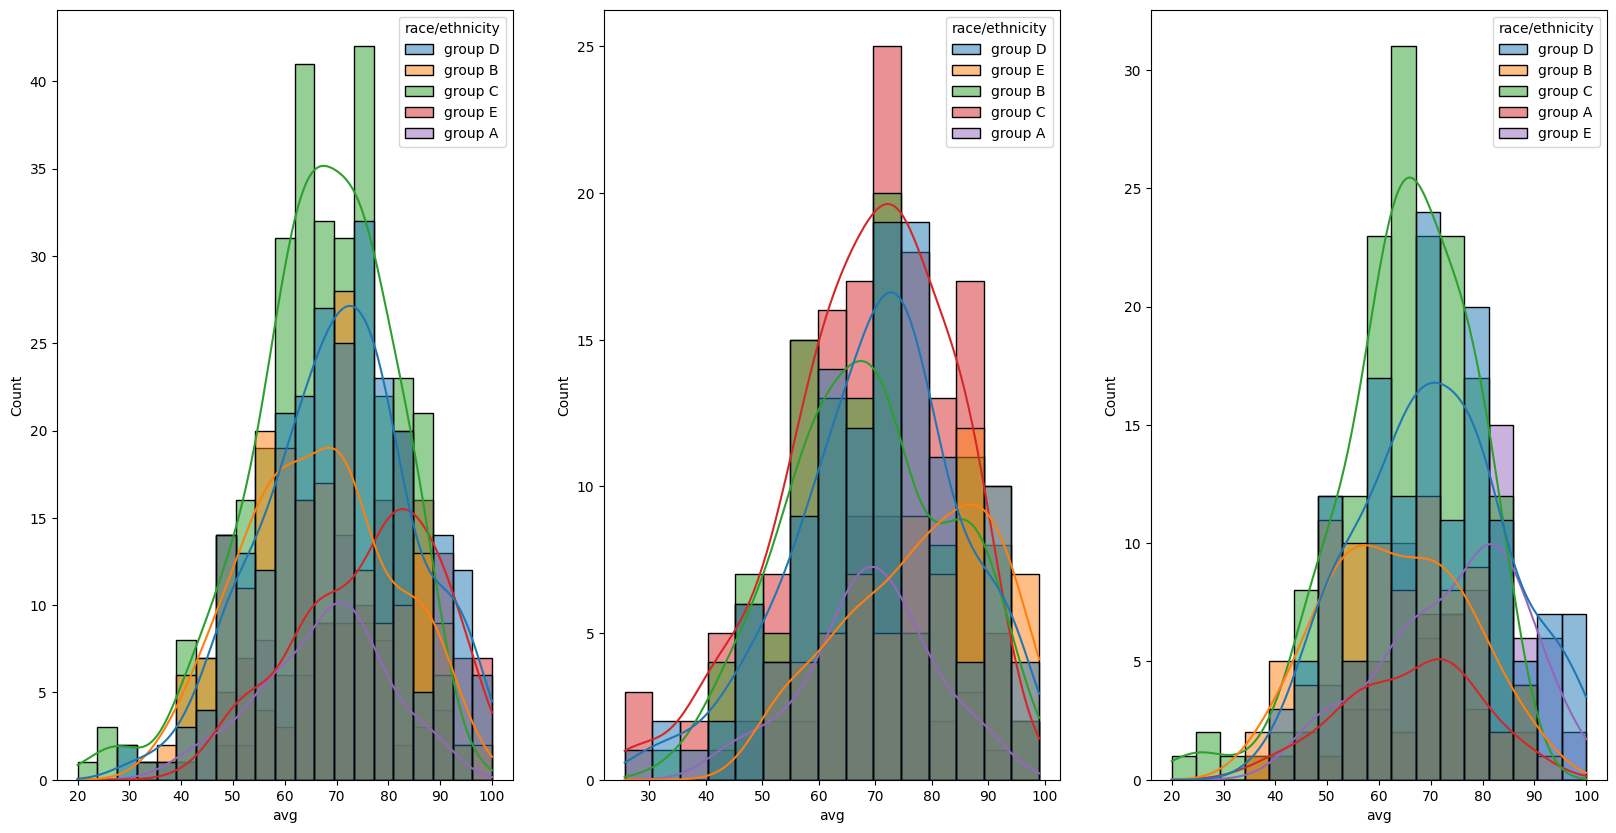

In [308]:
fig,ax = plt.subplots(1,3,figsize=(20,10))
plt.subplot(1,3,1)
sns.histplot(data=df,x="avg",kde=True,color="g",hue="race/ethnicity")
plt.subplot(1,3,2)
sns.histplot(data= df[df["gender"]=="female"], x="avg", kde=True, hue="race/ethnicity")
plt.subplot(1,3,3)
sns.histplot(data= df[df["gender"]=="male"], x="avg", kde=True, hue="race/ethnicity")

### observation 
#### group A and B perform poor in exam
#### group A and B perform poor in exam irrespective of whether they are male or female 

In [ ]:
sns.heatmap(df.corr() , annot=True)

# flight price prediction

In [310]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [311]:
df = pd.read_excel(r"C:\Users\dhruv\Downloads\flight_price.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [313]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [314]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [315]:
df["Date_of_Journey"]

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10683, dtype: object

In [328]:
pd.to_datetime(df["Date_of_Journey"],dayfirst=True).dt.day

0        24
1         1
2         9
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: Date_of_Journey, Length: 10683, dtype: int64

In [329]:
pd.to_datetime(df["Date_of_Journey"],dayfirst=True).dt.month

0        3
1        5
2        6
3        5
4        3
        ..
10678    4
10679    4
10680    4
10681    3
10682    5
Name: Date_of_Journey, Length: 10683, dtype: int64

In [330]:
pd.to_datetime(df["Date_of_Journey"],dayfirst=True).dt.year

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
10678    2019
10679    2019
10680    2019
10681    2019
10682    2019
Name: Date_of_Journey, Length: 10683, dtype: int64

In [205]:
df["Date_of_Journey"].str.split("/")

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [206]:
df["Date_of_Journey"].str.split("/").str[0]

0        24
1         1
2         9
3        12
4        01
         ..
10678     9
10679    27
10680    27
10681    01
10682     9
Name: Date_of_Journey, Length: 10683, dtype: object

In [207]:
df["Date_of_Journey"].str.split("/").str[1]

0        03
1        05
2        06
3        05
4        03
         ..
10678    04
10679    04
10680    04
10681    03
10682    05
Name: Date_of_Journey, Length: 10683, dtype: object

In [332]:
df.Date_of_Journey.unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [333]:
df["Day"] = df["Date_of_Journey"].str.split("/").str[0]
df["Month"] = df["Date_of_Journey"].str.split("/").str[1]
df["Year"] = df["Date_of_Journey"].str.split("/").str[2]

In [334]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [335]:
df["Day"] = df["Day"].astype("int")
df["Month"] = df["Month"].astype("int")
df["Year"] = df["Year"].astype("int")

In [336]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Day              10683 non-null  int32 
 12  Month            10683 non-null  int32 
 13  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


In [338]:
df.drop("Date_of_Journey",axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [344]:
pd.to_datetime(df["Arrival_Time"]).dt.hour

0         1
1        13
2         4
3        23
4        21
         ..
10678    22
10679    23
10680    11
10681    14
10682    19
Name: Arrival_Time, Length: 10683, dtype: int64

In [347]:
pd.to_datetime(df["Arrival_Time"]).dt.minute

0        10
1        15
2        25
3        30
4        35
         ..
10678    25
10679    20
10680    20
10681    10
10682    15
Name: Arrival_Time, Length: 10683, dtype: int64

In [349]:
pd.to_datetime(df["Arrival_Time"]).dt.second

0        0
1        0
2        0
3        0
4        0
        ..
10678    0
10679    0
10680    0
10681    0
10682    0
Name: Arrival_Time, Length: 10683, dtype: int64

In [214]:
df["Arrival_Time"].str.split(" ")

0        [01:10, 22, Mar]
1                 [13:15]
2        [04:25, 10, Jun]
3                 [23:30]
4                 [21:35]
               ...       
10678             [22:25]
10679             [23:20]
10680             [11:20]
10681             [14:10]
10682             [19:15]
Name: Arrival_Time, Length: 10683, dtype: object

In [215]:
df["Arrival_Time"].str.split(" ").str[0]

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [216]:
df["Arrival_Hours"] = df["Arrival_Time"].str.split(" ").str[0].str.split(":").str[0]

In [217]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,01
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,04
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,21


In [218]:
df["Arrival_min"] = df["Arrival_Time"].str.split(" ").str[0].str.split(":").str[0]

In [219]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,01,01
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,04,04
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,23,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,21,21


In [220]:
df.drop(["Arrival_Time"],axis=1,inplace=True)

In [221]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,01,01
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,13


In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Day              10683 non-null  int32 
 11  Month            10683 non-null  int32 
 12  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(9)
memory usage: 959.9+ KB


In [223]:
df["Arrival_Hours"] = df["Arrival_Hours"].astype("int")
df["Arrival_min"] = df["Arrival_min"].astype("int")

In [224]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,21


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Day              10683 non-null  int32 
 10  Month            10683 non-null  int32 
 11  Year             10683 non-null  int32 
 12  Arrival_Hours    10683 non-null  int32 
 13  Arrival_min      10683 non-null  int32 
dtypes: int32(5), int64(1), object(8)
memory usage: 959.9+ KB


In [226]:
df["Dep_hours"] = df["Dep_Time"].str.split(":").str[0]
df["Dep_Min"] = df["Dep_Time"].str.split(":").str[1]

In [227]:
df["Dep_hours"] = df["Dep_hours"].astype("int")
df["Dep_Min"] = df["Dep_Min"].astype("int")

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Day              10683 non-null  int32 
 10  Month            10683 non-null  int32 
 11  Year             10683 non-null  int32 
 12  Arrival_Hours    10683 non-null  int32 
 13  Arrival_min      10683 non-null  int32 
 14  Dep_hours        10683 non-null  int32 
 15  Dep_Min          10683 non-null  int32 
dtypes: int32(7), int64(1), object(8)
memory usage: 1.0+ MB


In [229]:
df.drop("Dep_Time" ,axis=1 ,inplace=True)

In [230]:
df.drop("Route" ,axis=1 ,inplace=True)

In [231]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_min,Dep_hours,Dep_Min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,1,1,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,13,13,5,50


In [232]:
df["Total_Stops"]

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10683, dtype: object

In [233]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [234]:
df["Total_Stops"].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [235]:
df["Total_Stops"] = df["Total_Stops"].map({'non-stop':0, '2 stops':2, '1 stop' :1, '3 stops' :3, np.nan :1 , '4 stops':4})

In [236]:
df["Total_Stops"]

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10683, dtype: int64

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Duration         10683 non-null  object
 4   Total_Stops      10683 non-null  int64 
 5   Additional_Info  10683 non-null  object
 6   Price            10683 non-null  int64 
 7   Day              10683 non-null  int32 
 8   Month            10683 non-null  int32 
 9   Year             10683 non-null  int32 
 10  Arrival_Hours    10683 non-null  int32 
 11  Arrival_min      10683 non-null  int32 
 12  Dep_hours        10683 non-null  int32 
 13  Dep_Min          10683 non-null  int32 
dtypes: int32(7), int64(2), object(5)
memory usage: 876.5+ KB


In [238]:
df["Duration"].str.split(" ").str[0].str.split("h").str[0].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [239]:
df["Duration_hours"] = df["Duration"].str.split(" ").str[0].str.split("h").str[0]

In [240]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_min,Dep_hours,Dep_Min,Duration_hours
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,1,22,20,2
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,13,5,50,7
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,9,6,2019,4,4,9,25,19
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,12,5,2019,23,23,18,5,5
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,1,3,2019,21,21,16,50,4


In [241]:
df["Duration_hours"].isnull().sum()

0

In [242]:
 df["Duration"].str.split(" ").str[1].str.split("m").str[0]

0         50
1         25
2        NaN
3         25
4         45
        ... 
10678     30
10679     35
10680    NaN
10681     40
10682     20
Name: Duration, Length: 10683, dtype: object

In [243]:
df["Duration_min"] = df["Duration"].str.split(" ").str[1].str.split("m").str[0]

In [244]:
df["Duration_min"].fillna(0)

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration_min, Length: 10683, dtype: object

In [245]:
df["Duration_hours"].value_counts()

2     2402
1      621
3      501
7      487
5      481
9      445
12     428
8      424
13     407
11     365
10     355
6      340
14     337
15     268
23     265
26     241
16     234
4      222
22     218
24     197
21     196
25     186
27     179
20     162
18     141
19     134
17     129
28      94
29      65
30      49
38      34
37      17
33      13
32       9
34       8
35       7
36       7
31       6
47       2
42       2
39       2
5m       1
41       1
40       1
Name: Duration_hours, dtype: int64

In [246]:
df[df["Duration_hours"]=="5m"]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_min,Dep_hours,Dep_Min,Duration_hours,Duration_min
6474,Air India,Mumbai,Hyderabad,5m,2,No info,17327,6,3,2019,16,16,16,50,5m,NaN


In [247]:
df.loc[6474,["Duration_hours"]] = 0
df.loc[6474,["Duration_min"]] = 5

In [248]:
df["Duration_hours"].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', 0, '41', '40'], dtype=object)

In [249]:
df["Duration_min"].replace({np.nan : 0},inplace=True)
df["Duration_min"].unique()

array(['50', '25', 0, '45', '30', '5', '15', '35', '10', '20', '55', '40',
       5], dtype=object)

In [250]:
df["Duration_hours"] = df["Duration_hours"].astype("int")
df["Duration_min"] = df["Duration_min"].astype("int")

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Duration         10683 non-null  object
 4   Total_Stops      10683 non-null  int64 
 5   Additional_Info  10683 non-null  object
 6   Price            10683 non-null  int64 
 7   Day              10683 non-null  int32 
 8   Month            10683 non-null  int32 
 9   Year             10683 non-null  int32 
 10  Arrival_Hours    10683 non-null  int32 
 11  Arrival_min      10683 non-null  int32 
 12  Dep_hours        10683 non-null  int32 
 13  Dep_Min          10683 non-null  int32 
 14  Duration_hours   10683 non-null  int32 
 15  Duration_min     10683 non-null  int32 
dtypes: int32(9), int64(2), object(5)
memory usage: 959.9+ KB


In [252]:
df.drop("Duration" , axis = 1 ,inplace =True)
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_min,Dep_hours,Dep_Min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,1,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,13,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,4,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,23,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,21,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,No info,4107,9,4,2019,22,22,19,55,2,30
10679,Air India,Kolkata,Banglore,0,No info,4145,27,4,2019,23,23,20,45,2,35
10680,Jet Airways,Banglore,Delhi,0,No info,7229,27,4,2019,11,11,8,20,3,0
10681,Vistara,Banglore,New Delhi,0,No info,12648,1,3,2019,14,14,11,30,2,40


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Total_Stops      10683 non-null  int64 
 4   Additional_Info  10683 non-null  object
 5   Price            10683 non-null  int64 
 6   Day              10683 non-null  int32 
 7   Month            10683 non-null  int32 
 8   Year             10683 non-null  int32 
 9   Arrival_Hours    10683 non-null  int32 
 10  Arrival_min      10683 non-null  int32 
 11  Dep_hours        10683 non-null  int32 
 12  Dep_Min          10683 non-null  int32 
 13  Duration_hours   10683 non-null  int32 
 14  Duration_min     10683 non-null  int32 
dtypes: int32(9), int64(2), object(4)
memory usage: 876.5+ KB


In [254]:
df["Destination"].mode()

0    Cochin
Name: Destination, dtype: object

In [255]:
df["Price"].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

In [175]:
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [176]:
df["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [177]:
df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [178]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()

In [179]:
one.fit_transform(df[["Airline","Source","Destination"]]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [180]:
one.get_feature_names_out()

array(['Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara',
       'Airline_Vistara Premium economy', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'], dtype=object)

In [181]:
df=pd.concat([df,pd.DataFrame(one.fit_transform(df[["Airline","Source","Destination"]]).toarray(),columns=one.get_feature_names_out())],axis=1)

In [182]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,No info,4107,9,4,2019,22,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,Air India,Kolkata,Banglore,0,No info,4145,27,4,2019,23,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10680,Jet Airways,Banglore,Delhi,0,No info,7229,27,4,2019,11,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,Vistara,Banglore,New Delhi,0,No info,12648,1,3,2019,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [183]:
df.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [184]:
df

,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_min,Dep_hours,Dep_Min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,No info,3897,24,3,2019,1,1,22,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,No info,7662,1,5,2019,13,13,5,50,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,No info,13882,9,6,2019,4,4,9,25,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,No info,6218,12,5,2019,23,23,18,5,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,No info,13302,1,3,2019,21,21,16,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,No info,4107,9,4,2019,22,22,19,55,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,0,No info,4145,27,4,2019,23,23,20,45,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10680,0,No info,7229,27,4,2019,11,11,8,20,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,0,No info,12648,1,3,2019,14,14,11,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [185]:
df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [186]:
df["Additional_Info"].str.lower().unique()

array(['no info', 'in-flight meal not included',
       'no check-in baggage included', '1 short layover',
       '1 long layover', 'change airports', 'business class',
       'red-eye flight', '2 long layover'], dtype=object)

In [187]:
df["Additional_Info"] = df["Additional_Info"].str.lower().map({"no info" : 0,"in-flight meal not included":1,"no check-in baggage included":2,"1 short layover":3,"1 long layover":4,"change airports":5,"business class":6,"red-eye flight":7,"2 long layover":8})

In [188]:
df

,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_min,Dep_hours,Dep_Min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,3897,24,3,2019,1,1,22,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,0,7662,1,5,2019,13,13,5,50,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,0,13882,9,6,2019,4,4,9,25,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0,6218,12,5,2019,23,23,18,5,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,0,13302,1,3,2019,21,21,16,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,4107,9,4,2019,22,22,19,55,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,0,0,4145,27,4,2019,23,23,20,45,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10680,0,0,7229,27,4,2019,11,11,8,20,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,0,0,12648,1,3,2019,14,14,11,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                10683 non-null  int64  
 1   Additional_Info                            10683 non-null  int64  
 2   Price                                      10683 non-null  int64  
 3   Day                                        10683 non-null  int32  
 4   Month                                      10683 non-null  int32  
 5   Year                                       10683 non-null  int32  
 6   Arrival_Hours                              10683 non-null  int32  
 7   Arrival_min                                10683 non-null  int32  
 8   Dep_hours                                  10683 non-null  int32  
 9   Dep_Min                                    10683 non-null  int32  
 10  Duration_hours        

In [190]:
df.isna().sum()

Total_Stops                                  0
Additional_Info                              0
Price                                        0
Day                                          0
Month                                        0
Year                                         0
Arrival_Hours                                0
Arrival_min                                  0
Dep_hours                                    0
Dep_Min                                      0
Duration_hours                               0
Duration_min                                 0
Airline_Air Asia                             0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Truje

In [191]:
df.describe()

,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_min,Dep_hours,Dep_Min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.0,10683.000000,10683.000000,10683.000000,10683.000000,...,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,0.824207,0.259758,9087.064121,13.508378,4.708602,2019.0,13.348778,13.348778,12.490686,24.411214,...,0.035664,0.424693,0.268745,0.065244,0.268745,0.424693,0.118412,0.065244,0.035664,0.087241
std,0.675199,0.554650,4611.359167,8.479277,1.164357,0.0,6.859125,6.859125,5.748650,18.767980,...,0.185460,0.494320,0.443328,0.246967,0.443328,0.494320,0.323111,0.246967,0.185460,0.282202
min,0.000000,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,8.000000,8.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,8372.000000,12.000000,5.000000,2019.0,14.000000,14.000000,11.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,12373.000000,21.000000,6.000000,2019.0,19.000000,19.000000,18.000000,40.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,8.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,23.000000,23.000000,55.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [198]:
df['Duration_hours'].mean()

10.246091921744828

In [196]:
df["Duration_min"].mean()

28.32771693344566

In [ ]:
df[""]

# Google play store

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")

In [29]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [30]:
df.to_csv("Google Dataset.csv")

In [31]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [33]:
df.shape

(10841, 13)

In [34]:
df.size

140933

In [35]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [36]:
## missing value 

In [37]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [38]:
# data have missing values

In [39]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [40]:
df["Reviews"].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [41]:
df["Reviews"] = df["Reviews"].astype("int")

ValueError: invalid literal for int() with base 10: '3.0M'

In [42]:
df["Reviews"].str.isnumeric().sum()

10840

In [43]:
len(df["Reviews"])

10841

In [44]:
df[~df["Reviews"].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [45]:
df2 = df.copy()

In [46]:
df2.drop(df2.index[10472],axis=0,inplace=True)

In [47]:
df2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [48]:
df2[~df2["Reviews"].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [49]:
df2["Reviews"] = df2["Reviews"].astype("int")

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [51]:
df2["Size"]

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10840, dtype: object

In [52]:
df2["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [53]:
## mb to  kb
#  19mb == 19000kb
##  'Varies with device'

In [54]:
df2["Size"] = df2["Size"].str.replace("M","000")
df2["Size"] = df2["Size"].str.replace("k","")
df2["Size"] = df2["Size"].replace('Varies with device',np.nan)
df2["Size"] = df2["Size"].astype(float)

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


In [56]:
df2["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [57]:
df2["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [58]:
items = ["+",",","$"]
features = ["Installs","Price"]

for item in items :
    for feature in features:
        df2[feature] = df2[feature].str.replace(item,"")

C:\Users\dhruv\AppData\Local\Temp\ipykernel_22944\3122011064.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2[feature] = df2[feature].str.replace(item,"")


In [59]:
df2["Price"].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [60]:
df2["Installs"].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [61]:
df2["Price"] = df2["Price"].astype(float)
df2["Installs"] = df2["Installs"].astype(int)

In [62]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


In [63]:
df2["Last Updated"] = pd.to_datetime(df2["Last Updated"])
df2["Day"] = df2["Last Updated"].dt.day
df2["Month"] = df2["Last Updated"].dt.month
df2["Year"] = df2["Last Updated"].dt.year

In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int32         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int32         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int64         
 14  Month           10840 non-null  int64         
 15  Ye

In [65]:
df2["Content Rating"].uniqueque()

AttributeError: 'Series' object has no attribute 'uniqueque'

In [66]:
# Eda

In [67]:
df2.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


In [68]:
df2[df2.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,NaN,10000000,Free,0.0,Everyone,Productivity,2018-04-06,Varies with device,Varies with device,6,4,2018
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,NaN,1000000,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device,6,8,2018
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,NaN,100000000,Free,0.0,Everyone,Productivity,2018-06-27,Varies with device,Varies with device,27,6,2018
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86000.0,10000,Free,0.0,Everyone,Medical,2018-06-01,0.6.88,5.0 and up,1,6,2018


In [69]:
df2[df2.duplicated("App")].shape

(1181, 16)

In [70]:
## the data set have duplicated data

In [71]:
df2 = df2.drop_duplicates(subset=["App"],keep="first")

In [72]:
df2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,6,7,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,20,1,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,19,1,2015


In [73]:
df2[df2.duplicated("App")].shape

(0, 16)

In [74]:
## lest goo

In [75]:
categorical_feature = [i for i in df2.columns if df2[i].dtypes == "O"]
numerical_feature =[i for i in df2.columns if df2[i].dtypes != "O"]

print(f"we have {len(categorical_feature)} categorical feature {categorical_feature}")
print(f"we have {len(numerical_feature)} numerical feature {numerical_feature}")

we have 7 categorical feature ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']
we have 9 numerical feature ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']


In [76]:
df2.dtypes

App                       object
Category                  object
Rating                   float64
Reviews                    int32
Size                     float64
Installs                   int32
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
Day                        int64
Month                      int64
Year                       int64
dtype: object

C:\Users\dhruv\AppData\Local\Temp\ipykernel_22944\2496268630.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df2[numerical_feature[i]],shade="True",color = "r")
C:\Users\dhruv\AppData\Local\Temp\ipykernel_22944\2496268630.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df2[numerical_feature[i]],shade="True",color = "r")
C:\Users\dhruv\AppData\Local\Temp\ipykernel_22944\2496268630.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df2[numerical_feature[i]],shade="True",color = "r")
C:\Users\dhruv\AppData\Local\Temp\ipykernel_22944\2496268630.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill

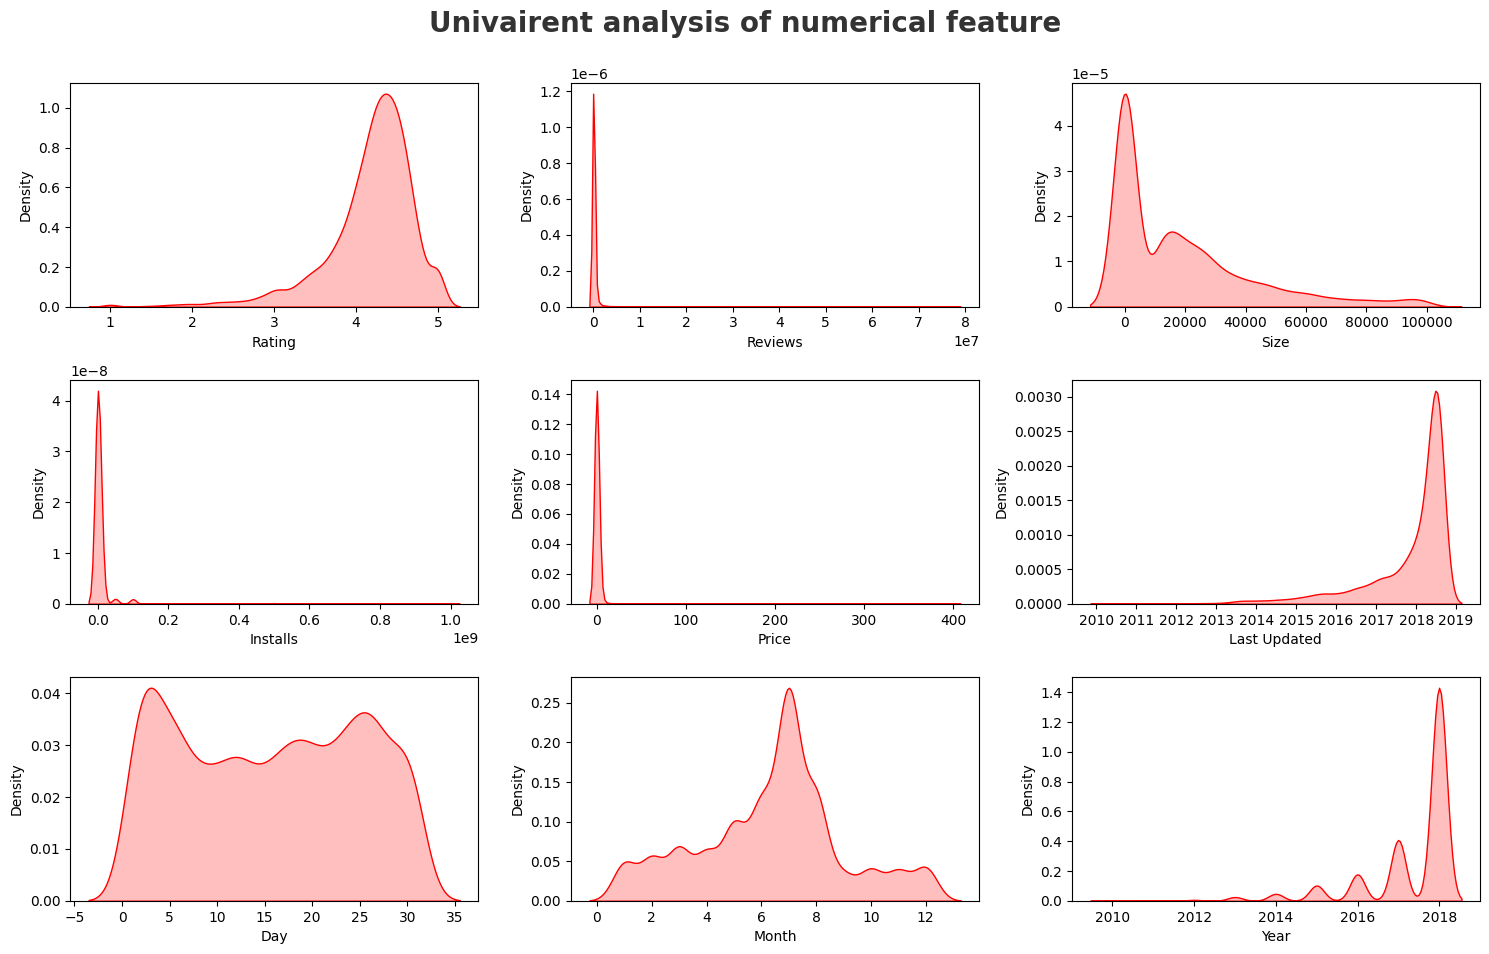

In [77]:
## visualization

plt.figure(figsize=(15,15))
plt.suptitle("Univairent analysis of numerical feature" , fontsize = 20 ,fontweight = "bold",alpha =0.8,y=1)

for i in range(0,len(numerical_feature)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df2[numerical_feature[i]],shade="True",color = "r")
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

In [78]:
#  observation :
#       rating , year , last update are left skewed
#       size , review , price , installs are right skewed 

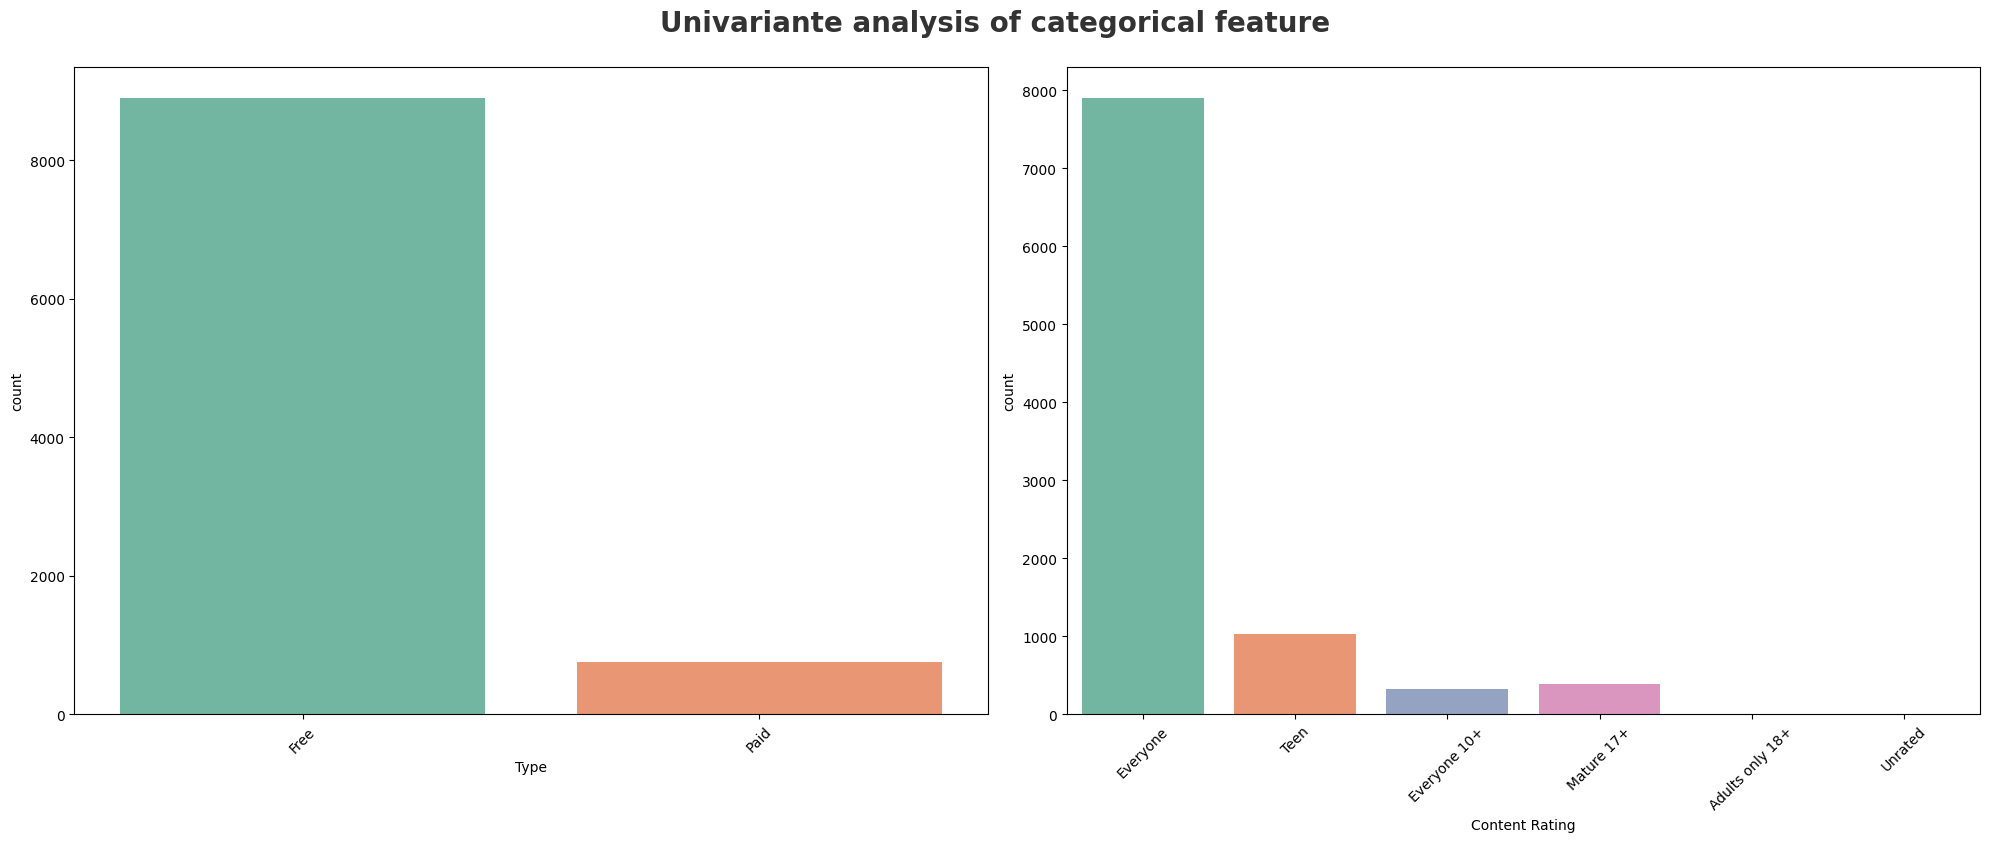

In [79]:
plt.figure(figsize=(20,15))
plt.suptitle("Univariante analysis of categorical feature",fontsize = 20,fontweight="bold",alpha=0.8,y=1)
category = ["Type","Content Rating"]
for i in range(0,len(category)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df2[category[i]] ,palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()
    

In [80]:
# which is the most popular app category

In [81]:
df2["Category"]

0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10836                 FAMILY
10837                 FAMILY
10838                MEDICAL
10839    BOOKS_AND_REFERENCE
10840              LIFESTYLE
Name: Category, Length: 9659, dtype: object

In [82]:
df2["Category"].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

<AxesSubplot: ylabel='Category'>

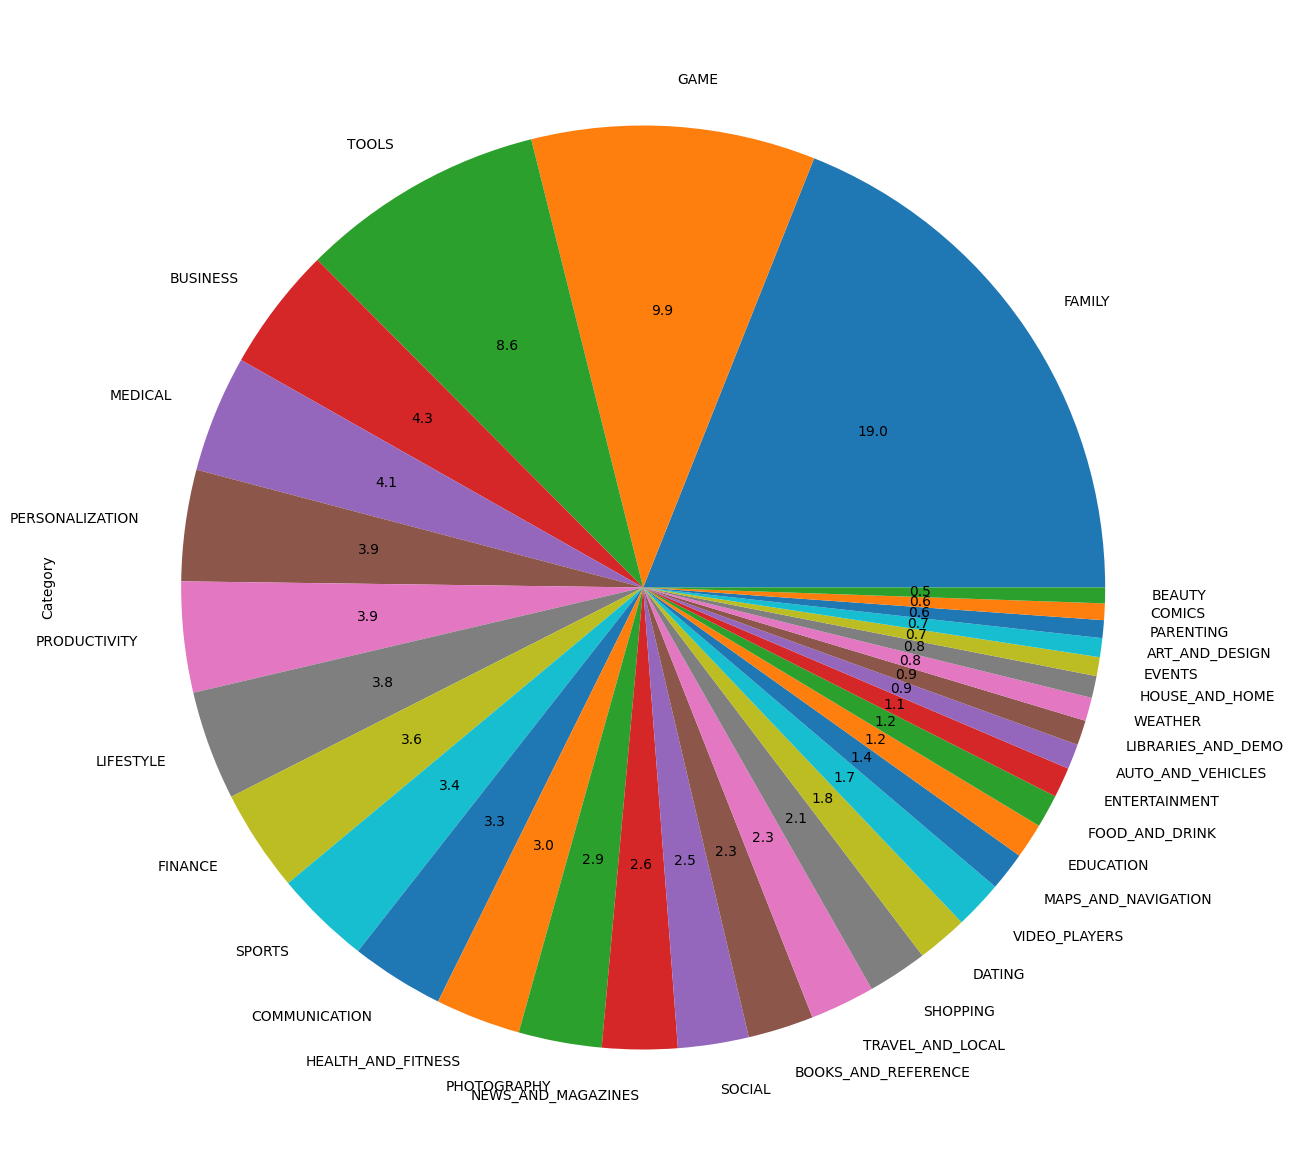

In [83]:
df2["Category"].value_counts().plot.pie(y=df2["Category"] , figsize=(15,15),autopct="%1.1f")

In [84]:
#  most are come in family, game ,tool

In [85]:
#  lest are come beauty, comics , events

In [86]:
## what are the top 10 app category

In [87]:
category = pd.DataFrame(df2["Category"].value_counts())
category.rename(columns={"Category":"count"},inplace=True)

In [88]:
category

,count
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345
SPORTS,325


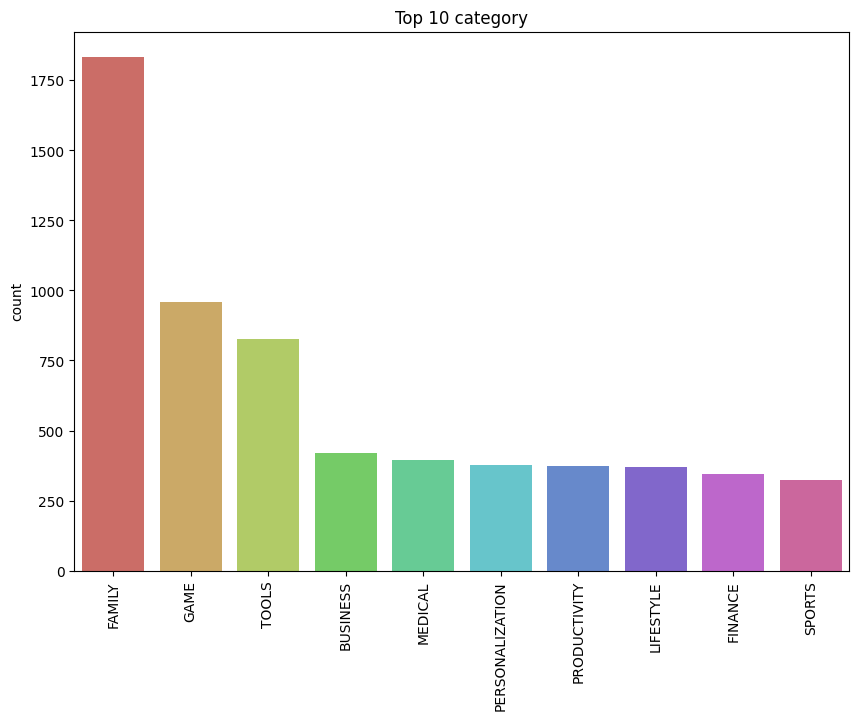

In [89]:
plt.figure(figsize=(10,7))
sns.barplot(x = category.index[:10] , y = "count", data = category[:10], palette="hls")
plt.title("Top 10 category")
plt.xticks(rotation=90)
plt.show()

In [90]:
# which category has largest number of installation ?

In [91]:
category_max_instollation = pd.DataFrame(df2.groupby(by="Category")["Installs"].sum().sort_values(ascending=False))

In [92]:
category_max_instollation.rename(columns={"Installs" : "number_of_installation"},inplace=True)
category_max_instollation.reset_index(inplace=True)

In [93]:
category_max_instollation

,Category,number_of_installation
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


In [94]:
category_max_instollation["number_of_installation"]

0     13878924415
1     11038276251
2      8001771915
3      5793091369
4      5487867902
5      4649147655
6      4427941505
7      3926902720
8      2894887146
9      2369217760
10     2113660000
11     1665969576
12     1532494782
13     1400348785
14     1144022512
15     1096474498
16      697164865
17      503823539
18      503281890
19      455348734
20      361100520
21      352952000
22      211798751
23      140926107
24      114338100
25       97212461
26       53130211
27       52995910
28       44981150
29       38193177
30       31521110
31       27197050
32       15973161
Name: number_of_installation, dtype: int64

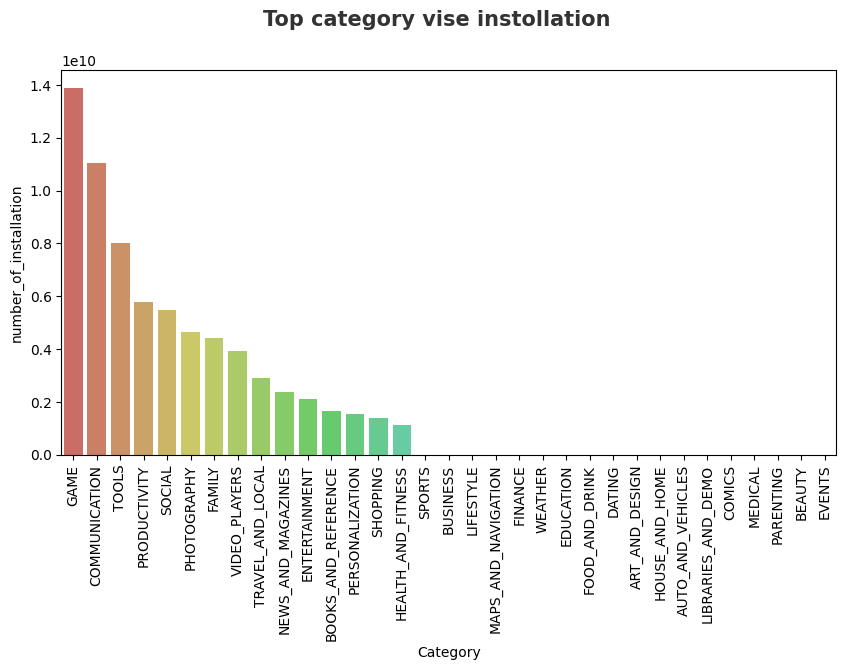

In [95]:
plt.figure(figsize=(10,5))
plt.suptitle("Top category vise instollation",fontsize=15,fontweight="bold",alpha=0.8,y=1)
sns.barplot(x="Category"[:15] , y =category_max_instollation["number_of_installation"][:15] , data = category_max_instollation, palette="hls")
plt.xticks(rotation=90)
plt.show()

In [96]:
# what are the top 5 most installed app in each popular categories?

In [97]:
df2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,6,7,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,20,1,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,19,1,2015


In [98]:
app_category = df2.groupby(by ="App")[["Category","Installs"]].max().sort_values(by = ["Category","Installs"],ascending=False)

In [99]:
app_category = app_category.reset_index()

In [100]:
app_category[app_category["Category"] == "WEATHER"][0:5]

,App,Category,Installs
0,AccuWeather: Daily Forecast & Live Weather Rep...,WEATHER,50000000
1,"GO Weather - Widget, Theme, Wallpaper, Efficient",WEATHER,50000000
2,The Weather Channel: Rain Forecast & Storm Alerts,WEATHER,50000000
3,Weather & Clock Widget for Android,WEATHER,50000000
4,Amber Weather,WEATHER,10000000


In [101]:
popular_categorry = df2["Category"].value_counts().to_frame()

In [102]:
top_5 = popular_categorry.index[0:5]

In [103]:
for i in top_5 :
    print(i)

FAMILY
GAME
TOOLS
BUSINESS
MEDICAL


In [104]:
FAMILY = app_category[app_category["Category"] == "FAMILY"][0:5]
    

In [105]:
GAME = app_category[app_category["Category"] == "GAME"][0:5]

In [106]:
TOOLS = app_category[app_category["Category"] == "TOOLS"][0:5]

In [107]:
BUSINESS = app_category[app_category["Category"] == "BUSINESS"][0:5]

In [108]:
MEDICAL = app_category[app_category["Category"] == "MEDICAL"][0:5]

In [109]:
FAMILY

,App,Category,Installs
6156,Bitmoji – Your Personal Emoji,FAMILY,100000000
6157,Bubble Witch 2 Saga,FAMILY,100000000
6158,Hay Day,FAMILY,100000000
6159,Talking Ginger,FAMILY,100000000
6160,Talking Tom & Ben News,FAMILY,100000000


In [110]:
GAME

,App,Category,Installs
4740,Subway Surfers,GAME,1000000000
4741,Candy Crush Saga,GAME,500000000
4742,My Talking Tom,GAME,500000000
4743,Pou,GAME,500000000
4744,Temple Run 2,GAME,500000000


In [111]:
TOOLS

,App,Category,Installs
461,Google,TOOLS,1000000000
462,Clean Master- Space Cleaner & Antivirus,TOOLS,500000000
463,Gboard - the Google Keyboard,TOOLS,500000000
464,Google Translate,TOOLS,500000000
465,SHAREit - Transfer & Share,TOOLS,500000000


In [112]:
BUSINESS

,App,Category,Installs
8815,File Commander - File Manager/Explorer,BUSINESS,100000000
8816,OfficeSuite : Free Office + PDF Editor,BUSINESS,100000000
8817,Docs To Go™ Free Office Suite,BUSINESS,50000000
8818,Facebook Pages Manager,BUSINESS,50000000
8819,Indeed Job Search,BUSINESS,50000000


In [113]:
MEDICAL

,App,Category,Installs
3399,Blood Pressure,MEDICAL,5000000
3400,My Calendar - Period Tracker,MEDICAL,5000000
3401,1800 Contacts - Lens Store,MEDICAL,1000000
3402,Ada - Your Health Guide,MEDICAL,1000000
3403,Anatomy Learning - 3D Atlas,MEDICAL,1000000


In [114]:
# how many apps are there in google app store which get 5 rating 

In [115]:
df2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,6,7,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,20,1,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,19,1,2015


In [116]:
number_of_app = len(df2[df2["Rating"]==5])

In [117]:
number_of_app

271

In [118]:
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [119]:
df2.corr()

C:\Users\dhruv\AppData\Local\Temp\ipykernel_22944\1778878097.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,Rating,Reviews,Size,Installs,Price,Day,Month,Year
Rating,1.000000,0.055081,0.061223,0.040143,-0.021199,-0.010430,0.011523,0.125843
Reviews,0.055081,1.000000,0.176255,0.625165,-0.007598,-0.033099,0.036541,0.058073
Size,0.061223,0.176255,1.000000,0.133988,-0.022141,-0.014633,0.032427,0.195768
Installs,0.040143,0.625165,0.133988,1.000000,-0.009405,-0.042036,0.043178,0.068839
Price,-0.021199,-0.007598,-0.022141,-0.009405,1.000000,-0.009106,0.007348,-0.003608
Day,-0.010430,-0.033099,-0.014633,-0.042036,-0.009106,1.000000,-0.066566,-0.015070
Month,0.011523,0.036541,0.032427,0.043178,0.007348,-0.066566,1.000000,-0.199906
Year,0.125843,0.058073,0.195768,0.068839,-0.003608,-0.015070,-0.199906,1.000000


In [257]:
df2["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [261]:
df2["Size"].mean()/1000

18.37219583728653

In [263]:
df2['Category'].mode()

0    FAMILY
Name: Category, dtype: object